**Visual Analysis**

In [4]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Data preprocess

In [6]:
data0 = pd.read_csv('delhivery_data.csv')

In [7]:
data0.shape

(144867, 24)

In [8]:
data0.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [9]:
# Drop some unnecessary columns
data1 = data0.drop(['data','route_schedule_uuid','start_scan_to_end_scan','is_cutoff','start_scan_to_end_scan','is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_actual_time','segment_osrm_time','segment_osrm_distance','segment_factor'], axis=1)
data1.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'od_start_time', 'od_end_time', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance'],
      dtype='object')

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144867 non-null  object 
 1   route_type                      144867 non-null  object 
 2   trip_uuid                       144867 non-null  object 
 3   source_center                   144867 non-null  object 
 4   source_name                     144574 non-null  object 
 5   destination_center              144867 non-null  object 
 6   destination_name                144606 non-null  object 
 7   od_start_time                   144867 non-null  object 
 8   od_end_time                     144867 non-null  object 
 9   actual_distance_to_destination  144867 non-null  float64
 10  actual_time                     144867 non-null  float64
 11  osrm_time                       144867 non-null  float64
 12  osrm_distance   

In [11]:
data1.describe()

,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000
mean,234.073372,416.927527,213.868272,284.771297
std,344.990009,598.103621,308.011085,421.119294
min,9.000045,9.000000,6.000000,9.008200
25%,23.355874,51.000000,27.000000,29.914700
50%,66.126571,132.000000,64.000000,78.525800
75%,286.708875,513.000000,257.000000,343.193250
max,1927.447705,4532.000000,1686.000000,2326.199100


In [12]:
data1.describe(include=['object'])

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,144867,144867,144867,144867,144574,144867,144606,144867,144867
unique,14817,2,14817,1508,1498,1481,1468,26369,26369
top,2018-09-28 05:23:15.359220,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618
freq,101,99660,101,23347,23347,15192,15192,81,81


In [13]:
# Convert object type to datetime
data1['trip_creation_time'] = pd.to_datetime(data1['trip_creation_time'])
data1['od_start_time'] = pd.to_datetime(data1['od_start_time'])
data1['od_end_time'] = pd.to_datetime(data1['od_end_time'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_type                      144867 non-null  object        
 2   trip_uuid                       144867 non-null  object        
 3   source_center                   144867 non-null  object        
 4   source_name                     144574 non-null  object        
 5   destination_center              144867 non-null  object        
 6   destination_name                144606 non-null  object        
 7   od_start_time                   144867 non-null  datetime64[ns]
 8   od_end_time                     144867 non-null  datetime64[ns]
 9   actual_distance_to_destination  144867 non-null  float64       
 10  actual_time                     144867 non-null  float64

In [14]:
data1

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
0,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,10.435660,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,18.936842,24.0,20.0,21.7243
2,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,27.637279,40.0,28.0,32.5395
3,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,36.118028,62.0,40.0,45.5620
4,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,39.386040,68.0,44.0,54.2181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,45.258278,94.0,60.0,67.9280
144863,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,54.092531,120.0,76.0,85.6829
144864,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,66.163591,140.0,88.0,97.0933
144865,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,73.680667,158.0,98.0,111.2709


In [15]:
# Counting missing value
data1.isnull().sum()

trip_creation_time                  0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
dtype: int64

In [16]:
# Replace missing value by SimpleImputer
miss_cat = ['source_name','destination_name']
freq_imputer = SimpleImputer(strategy='most_frequent')
for col in miss_cat:
  data1[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data1[col])))

data1.isnull().sum()

trip_creation_time                0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
dtype: int64

In [17]:
df = data1.copy()

In [18]:
df.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'od_start_time', 'od_end_time', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance'],
      dtype='object')

In [19]:
# Merge rows to make the dataset clearer
df_1 = df.groupby(['trip_uuid','source_center','destination_center']).agg({'trip_creation_time':'first','route_type':'first','source_name':'first','destination_name':'last','od_start_time':'first','od_end_time':'last','actual_distance_to_destination':'max','actual_time':'max','osrm_time':'max','osrm_distance':'max'})
df_1

trip_creation_time  \
trip_uuid               source_center destination_center                              
trip-153671041653548748 IND209304AAA  IND000000ACB       2018-09-12 00:00:16.535741   
                        IND462022AAA  IND209304AAA       2018-09-12 00:00:16.535741   
trip-153671042288605164 IND561203AAB  IND562101AAA       2018-09-12 00:00:22.886430   
                        IND572101AAA  IND561203AAB       2018-09-12 00:00:22.886430   
trip-153671043369099517 IND000000ACB  IND160002AAC       2018-09-12 00:00:33.691250   
...                                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA       2018-10-03 23:59:14.390954   
                        IND628613AAA  IND627005AAA       2018-10-03 23:59:14.390954   
                        IND628801AAA  IND628204AAA       2018-10-03 23:59:14.390954   
trip-153861118270144424 IND583119AAA  IND583101AAA       2018-10-03 23:59:42.701692   
                        IND583201AAA  IND583119AAA       2018-10-03 23:59:42.701692   

                                                         route_type  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB              FTL   
                        IND462022AAA  IND209304AAA              FTL   
trip-153671042288605164 IND561203AAB  IND562101AAA          Carting   
                        IND572101AAA  IND561203AAB          Carting   
trip-153671043369099517 IND000000ACB  IND160002AAC              FTL   
...                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA          Carting   
                        IND628613AAA  IND627005AAA          Carting   
                        IND628801AAA  IND628204AAA          Carting   
trip-153861118270144424 IND583119AAA  IND583101AAA              FTL   
                        IND583201AAA  IND583119AAA              FTL   

                                                                                 source_name  \
trip_uuid               source_center destination_center                                       
trip-153671041653548748 IND209304AAA  IND000000ACB        Kanpur_Central_H_6 (Uttar Pradesh)   
                        IND462022AAA  IND209304AAA        Bhopal_Trnsport_H (Madhya Pradesh)   
trip-153671042288605164 IND561203AAB  IND562101AAA         Doddablpur_ChikaDPP_D (Karnataka)   
                        IND572101AAA  IND561203AAB             Tumkur_Veersagr_I (Karnataka)   
trip-153671043369099517 IND000000ACB  IND160002AAC             Gurgaon_Bilaspur_HB (Haryana)   
...                                                                                      ...   
trip-153861115439069069 IND628204AAA  IND627657AAA        Tirchchndr_Shnmgprm_D (Tamil Nadu)   
                        IND628613AAA  IND627005AAA         Peikulam_SriVnktpm_D (Tamil Nadu)   
                        IND628801AAA  IND628204AAA              Eral_Busstand_D (Tamil Nadu)   
trip-153861118270144424 IND583119AAA  IND583101AAA             Sandur_WrdN1DPP_D (Karnataka)   
                        IND583201AAA  IND583119AAA                        Hospet (Karnataka)   

                                                                               destination_name  \
trip_uuid               source_center destination_center                                          
trip-153671041653548748 IND209304AAA  IND000000ACB                Gurgaon_Bilaspur_HB (Haryana)   
                        IND462022AAA  IND209304AAA           Kanpur_Central_H_6 (Uttar Pradesh)   
trip-153671042288605164 IND561203AAB  IND562101AAA            Chikblapur_ShntiSgr_D (Karnataka)   
                        IND572101AAA  IND561203AAB            Doddablpur_ChikaDPP_D (Karnataka)   
trip-153671043369099517 IND000000ACB  IND160002AAC               Chandigarh_Mehmdpur_H (Punjab)   
...                                                                

In [20]:
df_1 = df.groupby('trip_uuid').agg({'trip_creation_time':'first','route_type':'first','source_name':'first','destination_name':'last','od_start_time':'first','od_end_time':'last','actual_distance_to_destination':'max','actual_time':'max','osrm_time':'max','osrm_distance':'max','source_center':'first','destination_center':'last'})
df_1 = df_1.reset_index()
df_1

,trip_uuid,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,source_center,destination_center
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,440.973689,830.0,394.0,544.8027,IND462022AAA,IND000000ACB
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,48.542890,96.0,42.0,56.9116,IND572101AAA,IND562101AAA
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1689.964663,2736.0,1529.0,2090.8743,IND562132AAA,IND160002AAC
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,59.0,15.0,19.6800,IND400072AAB,IND401104AAA
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,59.530350,147.0,46.0,63.6461,IND583101AAA,IND583101AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,31.261599,49.0,34.0,44.5639,IND160002AAC,IND160002AAC
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,15.513784,21.0,12.0,16.0882,IND121004AAB,IND121004AAA
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,19.349008,190.0,29.0,32.2277,IND209304AAA,IND209304AAA
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,37.387664,90.0,50.0,52.8070,IND627005AAA,IND627005AAA


In [21]:
# Break down destinations and sources cloumns into states, cities and place
df_1[['dest','dest_state']] = df_1['destination_name'].str.split('(',n=1,expand=True)
df_1['dest_state'] = df_1['dest_state'].str.rstrip(')')
df_1[['dest_city','dest_place','dest_code']] = df_1['dest'].str.split('_',n=2,expand=True)
df_1[['soc','soc_state']] = df_1['source_name'].str.split('(',n=1,expand=True)
df_1['soc_state'] = df_1['soc_state'].str.rstrip(')')
df_1[['soc_city','soc_place','soc_code']] = df_1['soc'].str.split('_',n=2,expand=True)
df_1 = df_1.drop(['dest','soc'],axis=1)
df_1

,trip_uuid,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,...,source_center,destination_center,dest_state,dest_city,dest_place,dest_code,soc_state,soc_city,soc_place,soc_code
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,440.973689,830.0,394.0,...,IND462022AAA,IND000000ACB,Haryana,Gurgaon,Bilaspur,HB,Madhya Pradesh,Bhopal,Trnsport,H
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,48.542890,96.0,42.0,...,IND572101AAA,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Tumkur,Veersagr,I
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1689.964663,2736.0,1529.0,...,IND562132AAA,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,Karnataka,Bangalore,Nelmngla,H
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,59.0,15.0,...,IND400072AAB,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub,None,None
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,59.530350,147.0,46.0,...,IND583101AAA,IND583101AAA,Karnataka,Bellary,Dc,None,Karnataka,Bellary,Dc,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,31.261599,49.0,34.0,...,IND160002AAC,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,15.513784,21.0,12.0,...,IND121004AAB,IND121004AAA,Haryana,Faridabad,Blbgarh,DC,Haryana,FBD,Balabhgarh,DPC
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,19.349008,190.0,29.0,...,IND209304AAA,IND209304AAA,Uttar Pradesh,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,37.387664,90.0,50.0,...,IND627005AAA,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   trip_creation_time              14817 non-null  datetime64[ns]
 2   route_type                      14817 non-null  object        
 3   source_name                     14817 non-null  object        
 4   destination_name                14817 non-null  object        
 5   od_start_time                   14817 non-null  datetime64[ns]
 6   od_end_time                     14817 non-null  datetime64[ns]
 7   actual_distance_to_destination  14817 non-null  float64       
 8   actual_time                     14817 non-null  float64       
 9   osrm_time                       14817 non-null  float64       
 10  osrm_distance                   14817 non-null  float64       
 11  so

In [23]:
# Data Visualization

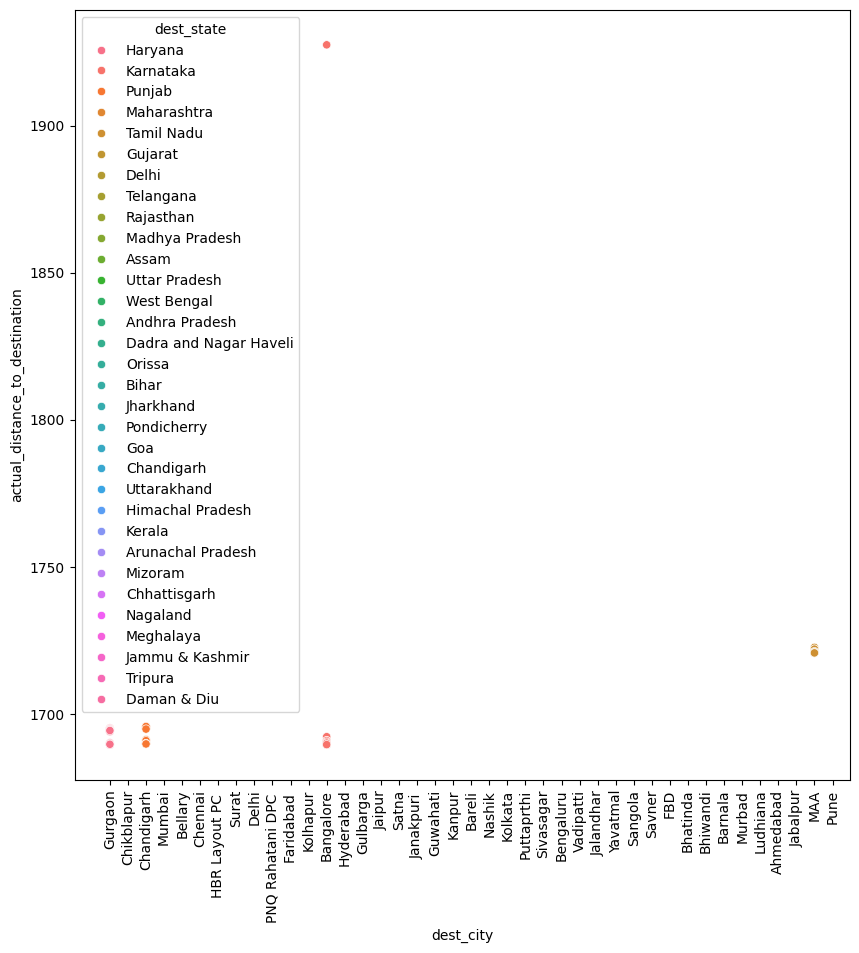

In [24]:
# Distance for top 100 cities to reach the destination
y=df_1['actual_distance_to_destination'].sort_values(ascending=False).head(100).to_frame()
plt.figure(figsize=(10,10))
sns.scatterplot(x=df_1['dest_city'],y=y['actual_distance_to_destination'],hue=df_1['dest_state'])
plt.xticks(rotation=90)
plt.show()

In [25]:
# Destination state with delivery count
x=df_1.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
x

,dest_state,trip_uuid
0,Maharashtra,2591
1,Karnataka,2275
2,Haryana,1697
3,Tamil Nadu,1072
4,Telangana,838
5,Gujarat,746
6,Uttar Pradesh,728
7,West Bengal,708
8,Punjab,693
9,Delhi,675


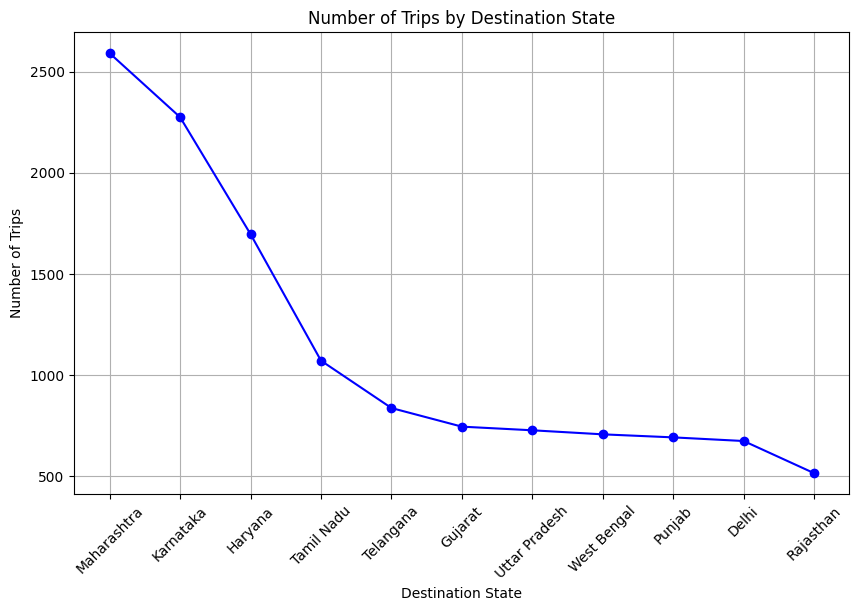

In [26]:
# line chart
state_counts = df_1.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(11)

plt.figure(figsize=(10, 6))
plt.plot(state_counts.index, state_counts.values, marker='o', linestyle='-', color='blue')

plt.title('Number of Trips by Destination State')
plt.xlabel('Destination State')
plt.ylabel('Number of Trips')

plt.xticks(rotation=45)
plt.grid()
plt.show()

In [27]:
# Destination place with according state and delivery count
y=df_1.groupby(['dest_place','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
y

,dest_place,dest_state,trip_uuid
0,Bilaspur,Haryana,886
1,Nelmngla,Karnataka,628
2,Mankoli,Maharashtra,604
3,Shamshbd,Telangana,459
4,Mehmdpur,Punjab,434
5,Kundli,Haryana,372
6,Bomsndra,Karnataka,315
7,Tathawde,Maharashtra,288
8,KGAirprt,Karnataka,278
9,East,Gujarat,257


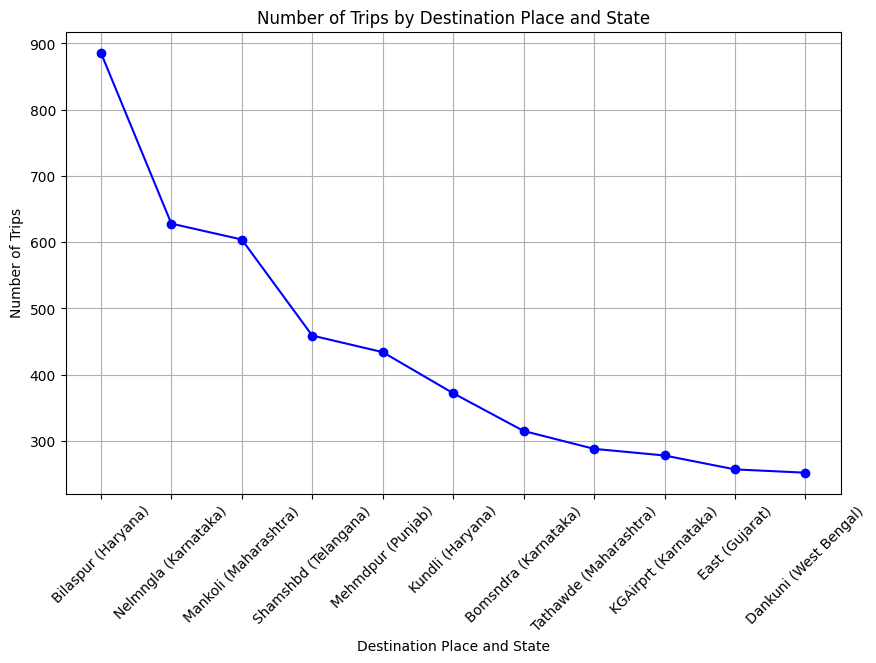

In [28]:
# line chart
counts = df_1.groupby(['dest_place', 'dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11)

counts_index = ['{} ({})'.format(place, state) for place, state in counts.index]

plt.figure(figsize=(10, 6))
plt.plot(counts_index, counts.values, marker='o', linestyle='-', color='blue')

plt.title('Number of Trips by Destination Place and State')
plt.xlabel('Destination Place and State')
plt.ylabel('Number of Trips')

plt.xticks(rotation=45)
plt.grid()

plt.show()

In [29]:
# Destination city with according state and delivery count
x=df_1.groupby(['dest_city','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
x

,dest_city,dest_state,trip_uuid
0,Bengaluru,Karnataka,1056
1,Gurgaon,Haryana,899
2,Mumbai,Maharashtra,891
3,Bangalore,Karnataka,646
4,Hyderabad,Telangana,630
5,Bhiwandi,Maharashtra,604
6,Delhi,Delhi,576
7,Chandigarh,Punjab,434
8,Chennai,Tamil Nadu,388
9,Sonipat,Haryana,375


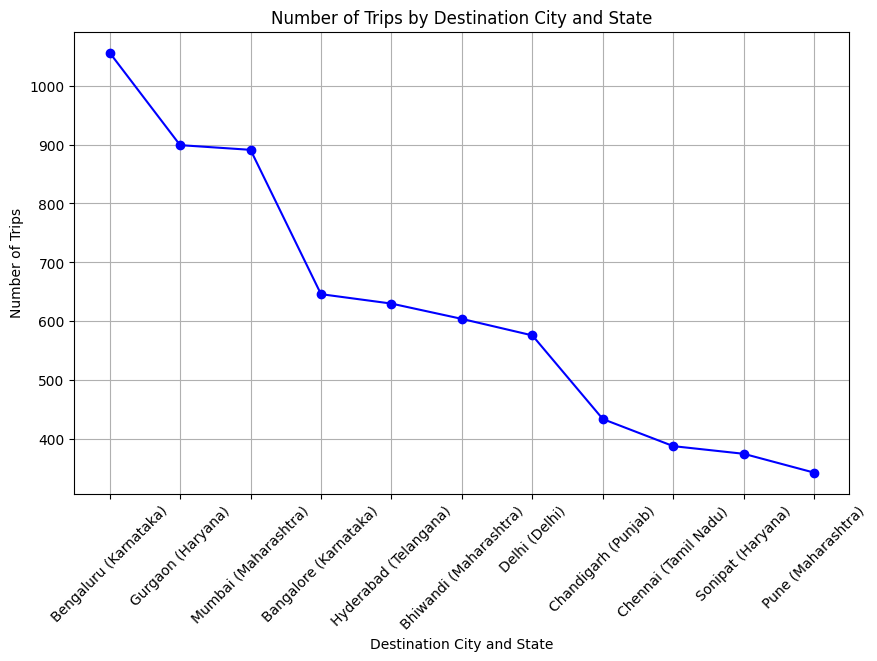

In [30]:
# line chart
counts = df_1.groupby(['dest_city', 'dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(11)

counts_index = ['{} ({})'.format(city, state) for city, state in counts.index]

plt.figure(figsize=(10, 6))
plt.plot(counts_index, counts.values, marker='o', linestyle='-', color='blue')

plt.title('Number of Trips by Destination City and State')
plt.xlabel('Destination City and State')
plt.ylabel('Number of Trips')

plt.xticks(rotation=45)
plt.grid()

plt.show()

In [31]:
# Source city with according state and delivery count
x=df_1.groupby(['soc_city','soc_state'])['trip_uuid'].count().sort_values(ascending=False).head(11).to_frame().reset_index()
x

,soc_city,soc_state,trip_uuid
0,Gurgaon,Haryana,1043
1,Bengaluru,Karnataka,1015
2,Bhiwandi,Maharashtra,811
3,Bangalore,Karnataka,755
4,Delhi,Delhi,620
5,Mumbai,Maharashtra,579
6,Hyderabad,Telangana,562
7,Pune,Maharashtra,445
8,Chandigarh,Punjab,370
9,Kolkata,West Bengal,339


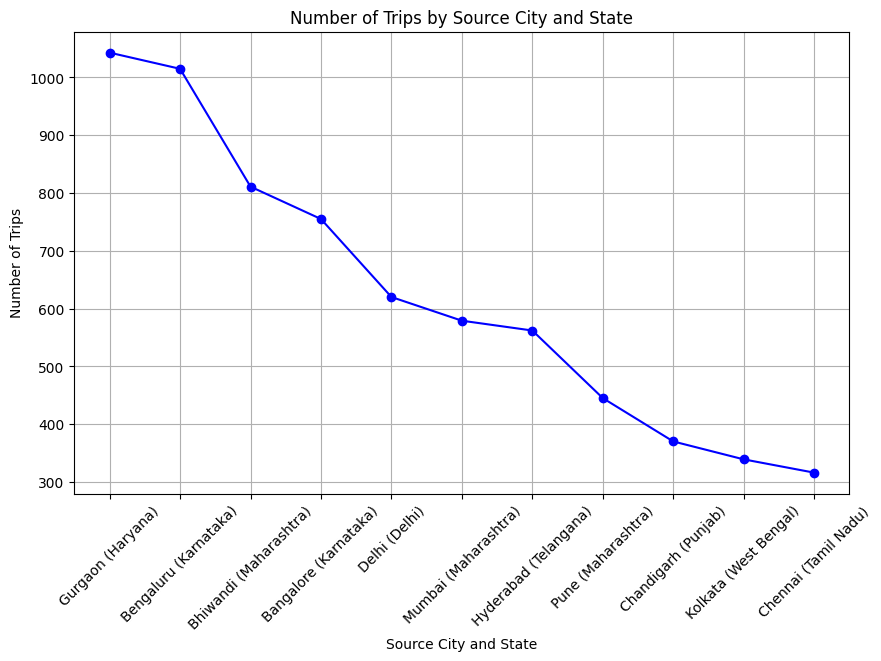

In [32]:
# line chart
counts = df_1.groupby(['soc_city', 'soc_state'])['trip_uuid'].count().sort_values(ascending=False).head(11)

counts_index = ['{} ({})'.format(city, state) for city, state in counts.index]

plt.figure(figsize=(10, 6))
plt.plot(counts_index, counts.values, marker='o', linestyle='-', color='blue')

plt.title('Number of Trips by Source City and State')
plt.xlabel('Source City and State')
plt.ylabel('Number of Trips')

plt.xticks(rotation=45)
plt.grid()

plt.show()

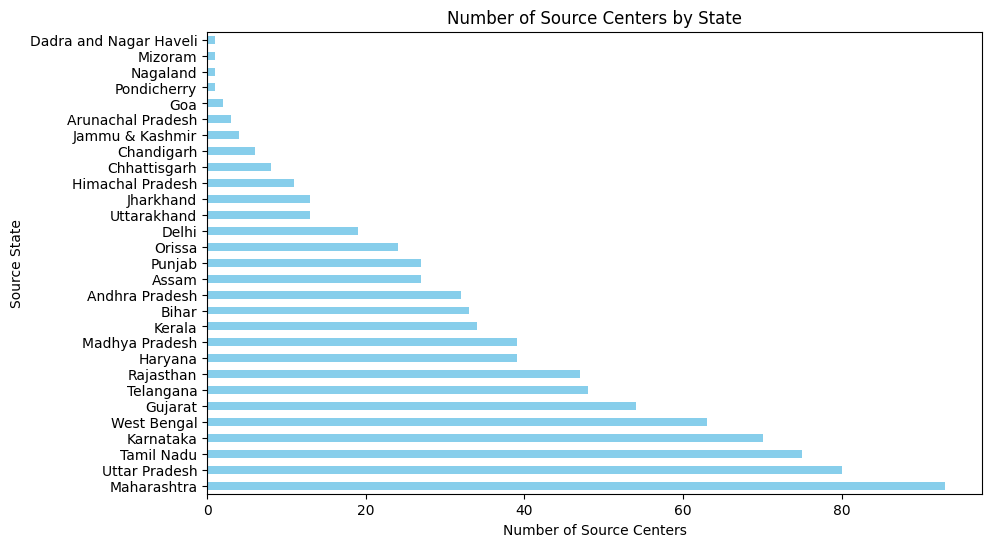

In [33]:
# Source center counts for different states using horizontal bar chart
counts = df_1.groupby('soc_state')['source_center'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
counts.plot(kind='barh', color='skyblue')
plt.title('Number of Source Centers by State')
plt.xlabel('Number of Source Centers')
plt.ylabel('Source State')

plt.show()

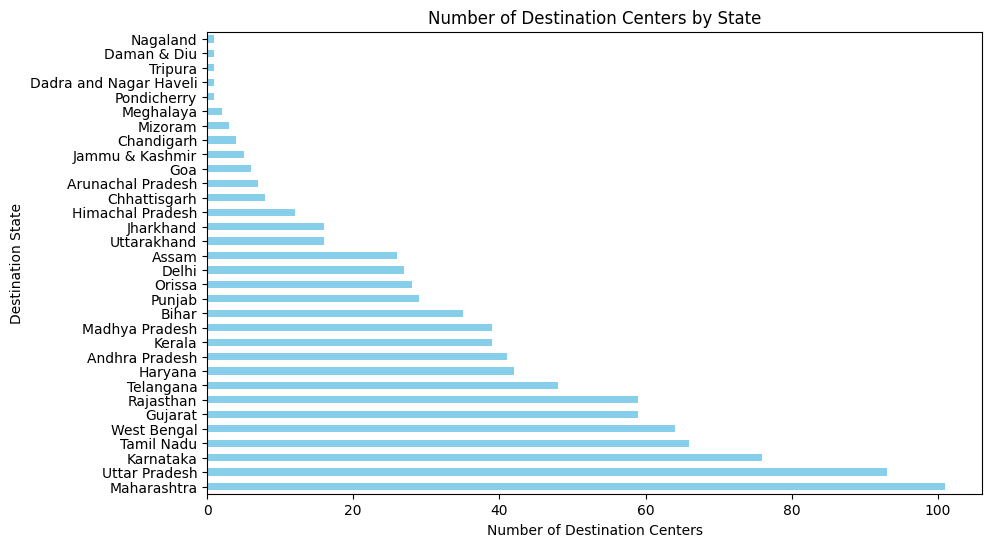

In [34]:
# Destination center counts for different states using horizontal bar chart
counts = df_1.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
counts.plot(kind='barh', color='skyblue')
plt.title('Number of Destination Centers by State')
plt.xlabel('Number of Destination Centers')
plt.ylabel('Destination State')

plt.show()

In [35]:
df_1['weekday'] = df_1['trip_creation_time'].dt.day_name()
df_1

,trip_uuid,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,actual_distance_to_destination,actual_time,osrm_time,...,destination_center,dest_state,dest_city,dest_place,dest_code,soc_state,soc_city,soc_place,soc_code,weekday
0,trip-153671041653548748,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,440.973689,830.0,394.0,...,IND000000ACB,Haryana,Gurgaon,Bilaspur,HB,Madhya Pradesh,Bhopal,Trnsport,H,Wednesday
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,48.542890,96.0,42.0,...,IND562101AAA,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Tumkur,Veersagr,I,Wednesday
2,trip-153671043369099517,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,1689.964663,2736.0,1529.0,...,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,Karnataka,Bangalore,Nelmngla,H,Wednesday
3,trip-153671046011330457,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17.175274,59.0,15.0,...,IND401104AAA,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,Mumbai Hub,None,None,Wednesday
4,trip-153671052974046625,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,59.530350,147.0,46.0,...,IND583101AAA,Karnataka,Bellary,Dc,None,Karnataka,Bellary,Dc,None,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,31.261599,49.0,34.0,...,IND160002AAC,Punjab,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H,Wednesday
14813,trip-153861104386292051,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,15.513784,21.0,12.0,...,IND121004AAA,Haryana,Faridabad,Blbgarh,DC,Haryana,FBD,Balabhgarh,DPC,Wednesday
14814,trip-153861106442901555,2018-10-03 23:57:44.429324,Carting,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44.429324,2018-10-04 06:59:51.621332,19.349008,190.0,29.0,...,IND209304AAA,Uttar Pradesh,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6,Wednesday
14815,trip-153861115439069069,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 05:47:45.162682,37.387664,90.0,50.0,...,IND627005AAA,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Wednesday


In [36]:
# Delivery counts on weekdays
h=df_1['weekday'].value_counts().to_frame('count').reset_index()
h

,weekday,count
0,Wednesday,2739
1,Saturday,2130
2,Thursday,2106
3,Friday,2060
4,Tuesday,2040
5,Monday,1987
6,Sunday,1755


/var/folders/8t/3xrvdszj1g75llc2jb40dnvw0000gn/T/ipykernel_2071/4002638699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday'], y=h['count'], palette='Set2')


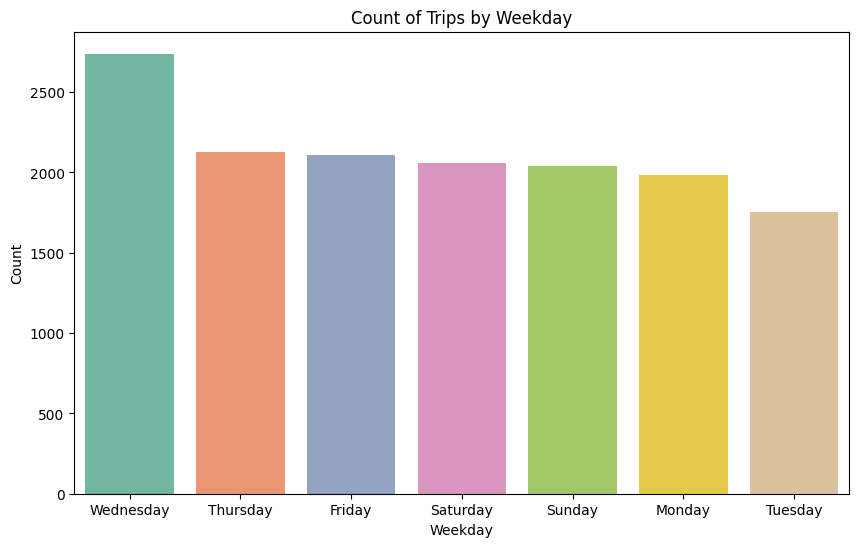

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday'], y=h['count'], palette='Set2')

plt.title('Count of Trips by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')

plt.show()

In [38]:
x1=df_1.groupby('soc_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['soc_state'], value_vars=['actual_time', 'osrm_time'])
x1

,soc_state,variable,value
0,Andhra Pradesh,actual_time,162.402948
1,Arunachal Pradesh,actual_time,429.250000
2,Assam,actual_time,499.739927
3,Bihar,actual_time,352.952381
4,Chandigarh,actual_time,111.333333
5,Chhattisgarh,actual_time,159.395349
6,Dadra and Nagar Haveli,actual_time,48.333333
7,Delhi,actual_time,323.812106
8,Goa,actual_time,412.600000
9,Gujarat,actual_time,238.990617


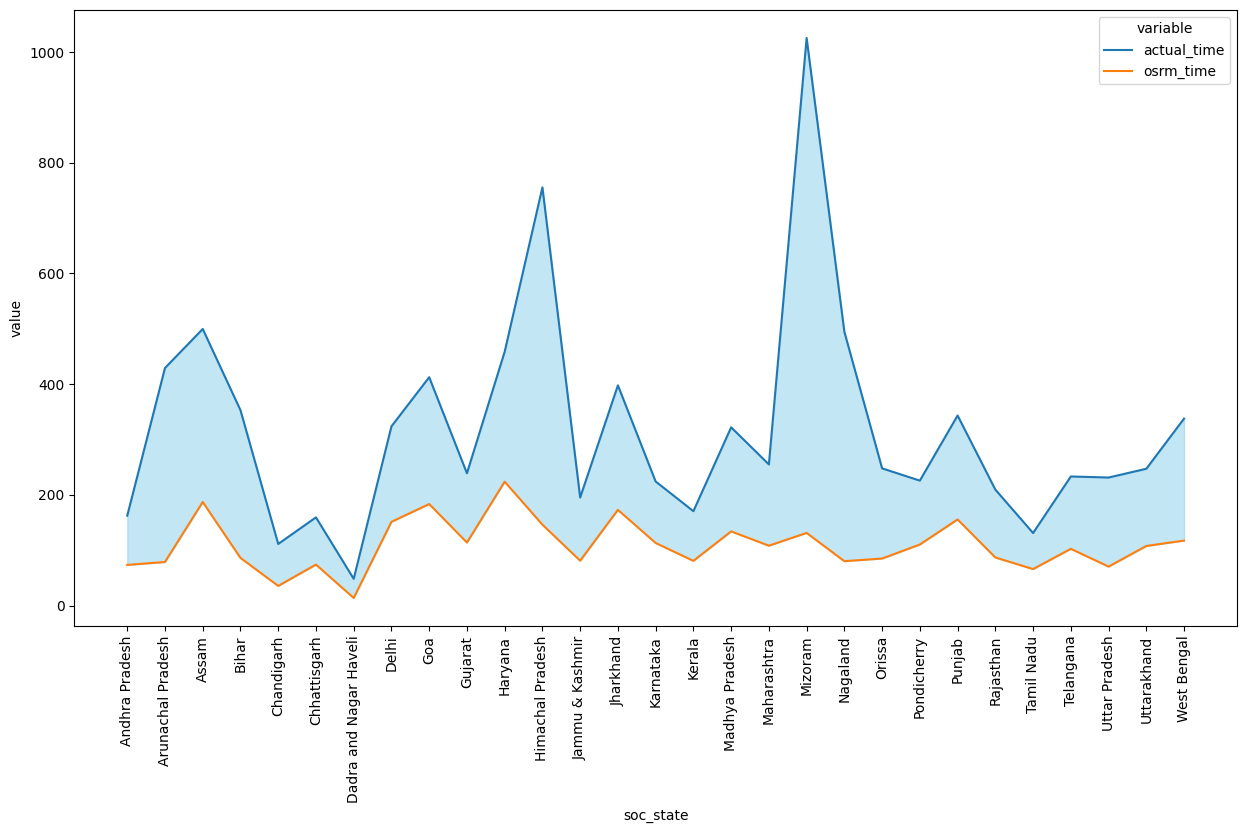

In [39]:
# Comparison of actual and estimated time
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='soc_state',y='value',hue='variable')
actual_time = df_1.groupby('soc_state')['actual_time'].mean().reset_index()['actual_time']
osrm_time = df_1.groupby('soc_state')['osrm_time'].mean().reset_index()['osrm_time']
x_fill = np.arange(len(actual_time))
plt.fill_between(x_fill, actual_time, osrm_time, where=(actual_time > osrm_time), color='skyblue', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [40]:
x1=df_1.groupby('soc_state').agg({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['soc_state'], value_vars=['actual_distance_to_destination', 'osrm_distance'])
x1

,soc_state,variable,value
0,Andhra Pradesh,actual_distance_to_destination,72.319235
1,Arunachal Pradesh,actual_distance_to_destination,77.150532
2,Assam,actual_distance_to_destination,184.203935
3,Bihar,actual_distance_to_destination,95.944080
4,Chandigarh,actual_distance_to_destination,32.061986
5,Chhattisgarh,actual_distance_to_destination,64.634942
6,Dadra and Nagar Haveli,actual_distance_to_destination,14.349976
7,Delhi,actual_distance_to_destination,160.180430
8,Goa,actual_distance_to_destination,166.366008
9,Gujarat,actual_distance_to_destination,121.877264


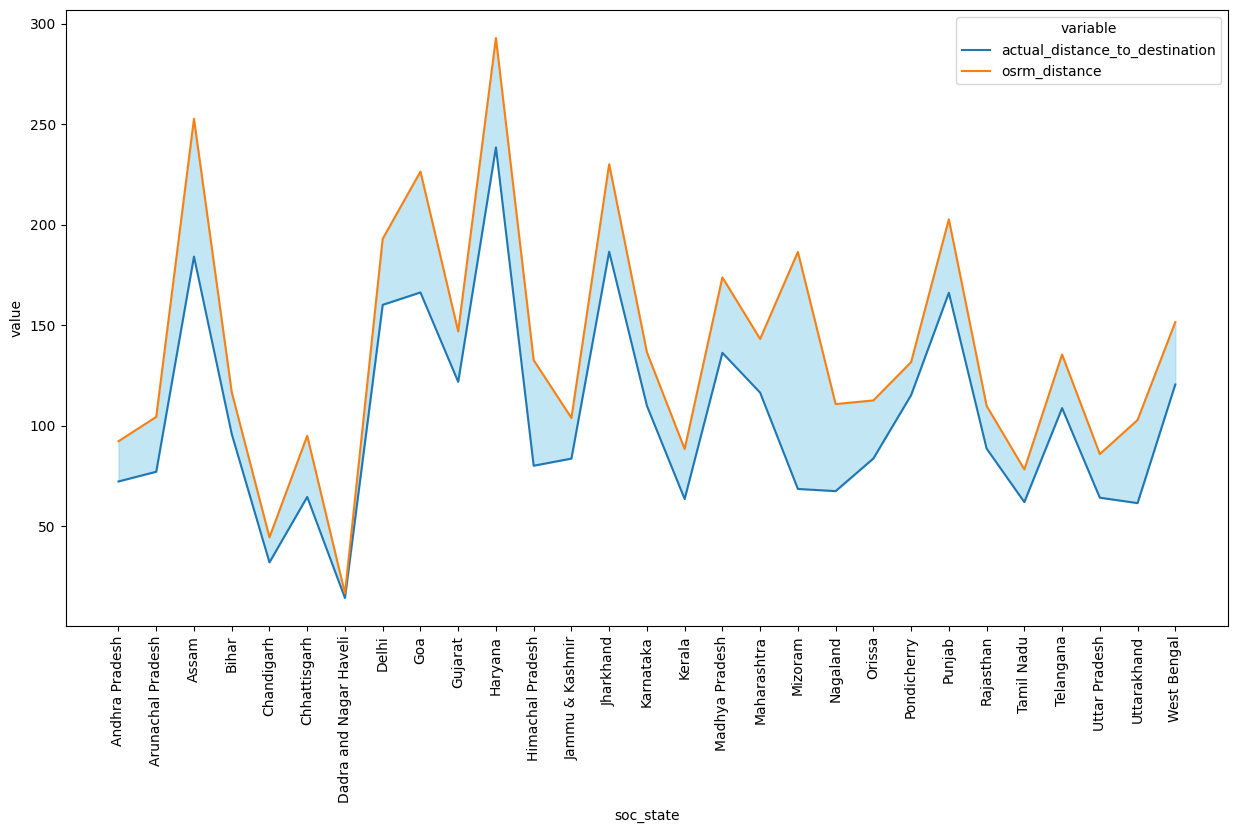

In [41]:
# Comparison of actual and estimated distance
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='soc_state',y='value',hue='variable')
actual_distance = df_1.groupby('soc_state')['actual_distance_to_destination'].mean().reset_index()['actual_distance_to_destination']
osrm_distance = df_1.groupby('soc_state')['osrm_distance'].mean().reset_index()['osrm_distance']
x_fill = np.arange(len(actual_time))
plt.fill_between(x_fill, actual_distance, osrm_distance, where=(actual_time > osrm_time), color='skyblue', alpha=0.5)
plt.xticks(rotation=90)
plt.show()

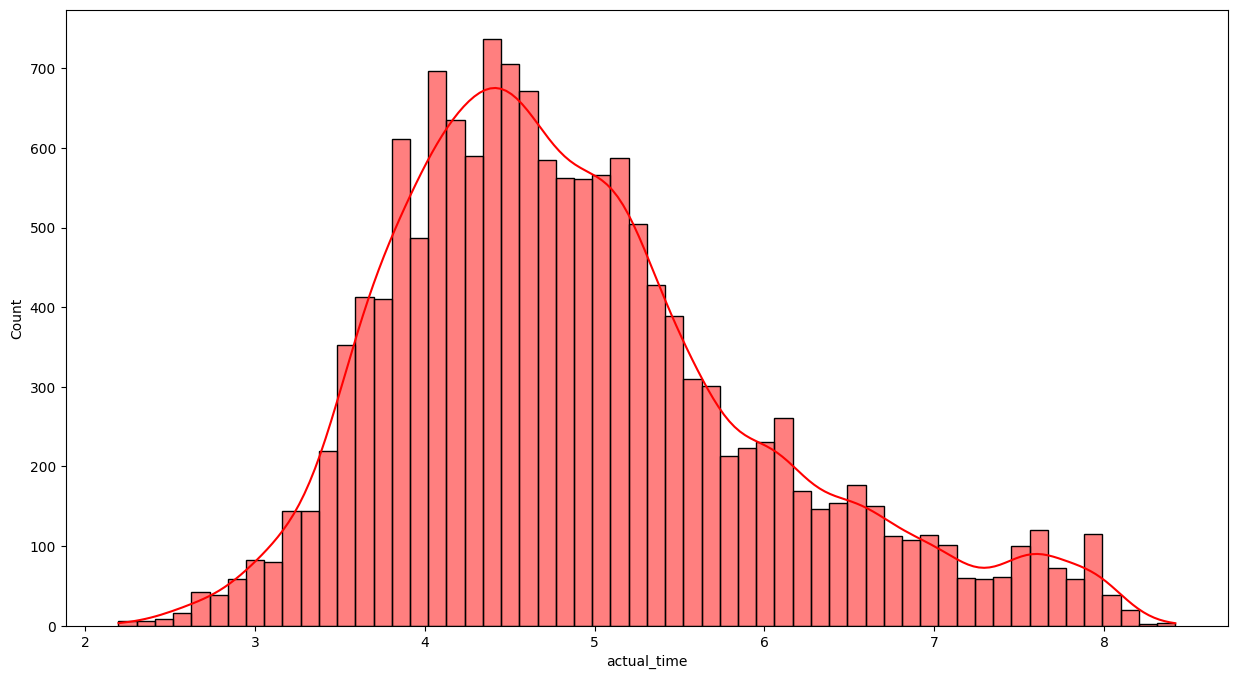

In [42]:
# Comparison of overall delivery time distribution after log transformation
plt.figure(figsize=(15,8))
actual_time_log =np.log(df_1['actual_time'])
sns.histplot(x=actual_time_log, kde=True, color='red', alpha=0.5)
plt.show()

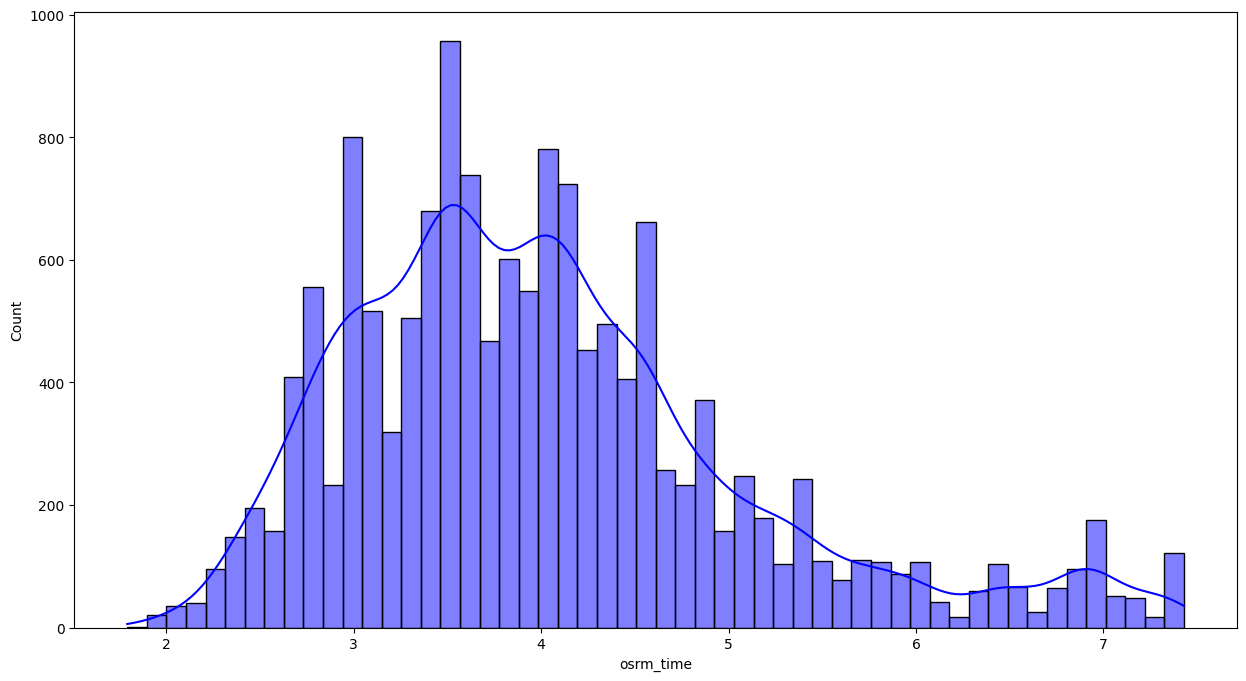

In [43]:
plt.figure(figsize=(15,8))
osrm_time_log =np.log(df_1['osrm_time'])
sns.histplot(x=osrm_time_log, kde=True, color='blue', alpha=0.5)
plt.show()

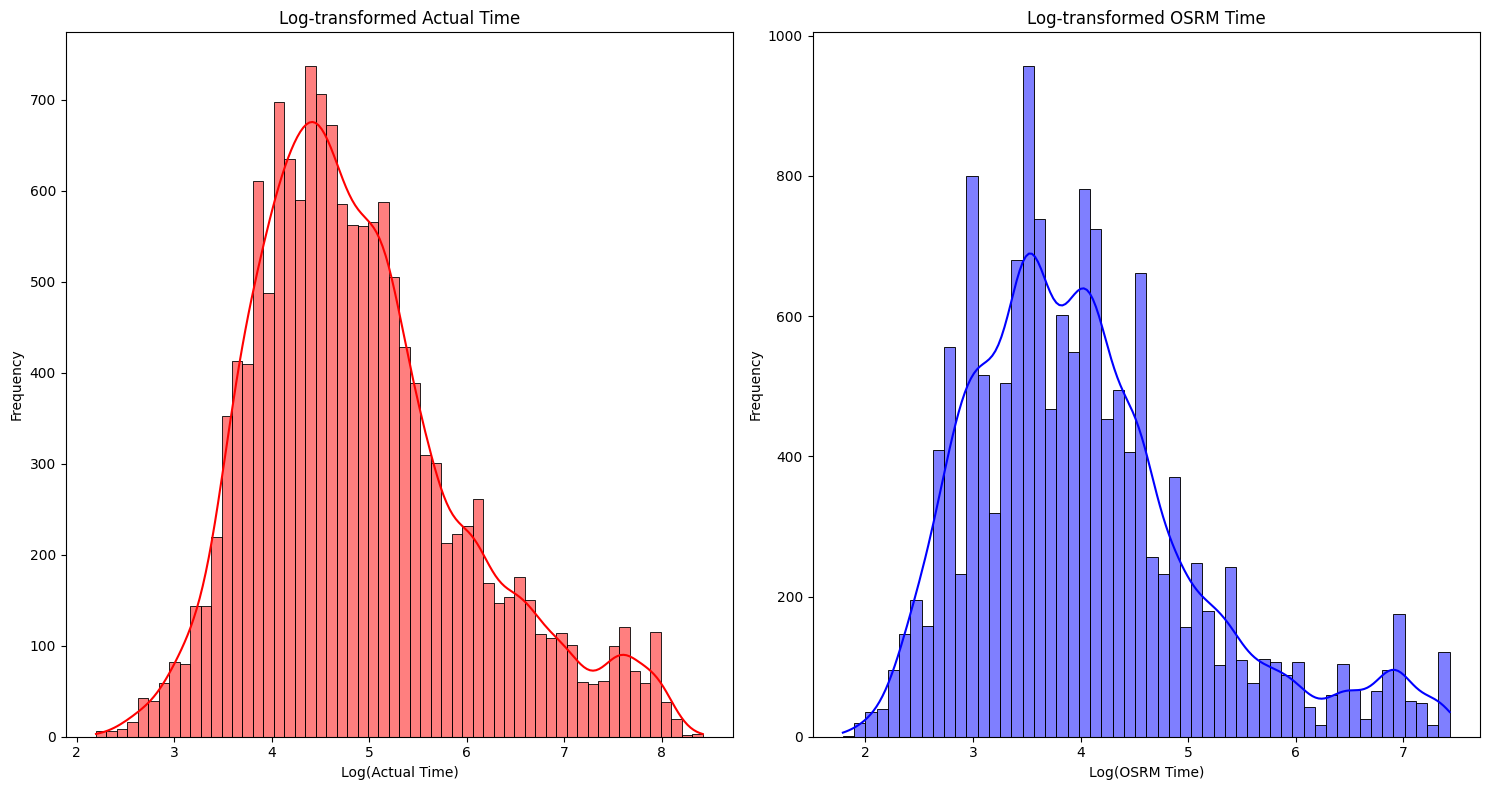

In [44]:
actual_time_log = np.log(df_1['actual_time'])
osrm_time_log = np.log(df_1['osrm_time'])

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.histplot(x=actual_time_log, kde=True, color='red', alpha=0.5)
plt.title('Log-transformed Actual Time')
plt.xlabel('Log(Actual Time)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(x=osrm_time_log, kde=True, color='blue', alpha=0.5)
plt.title('Log-transformed OSRM Time')
plt.xlabel('Log(OSRM Time)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

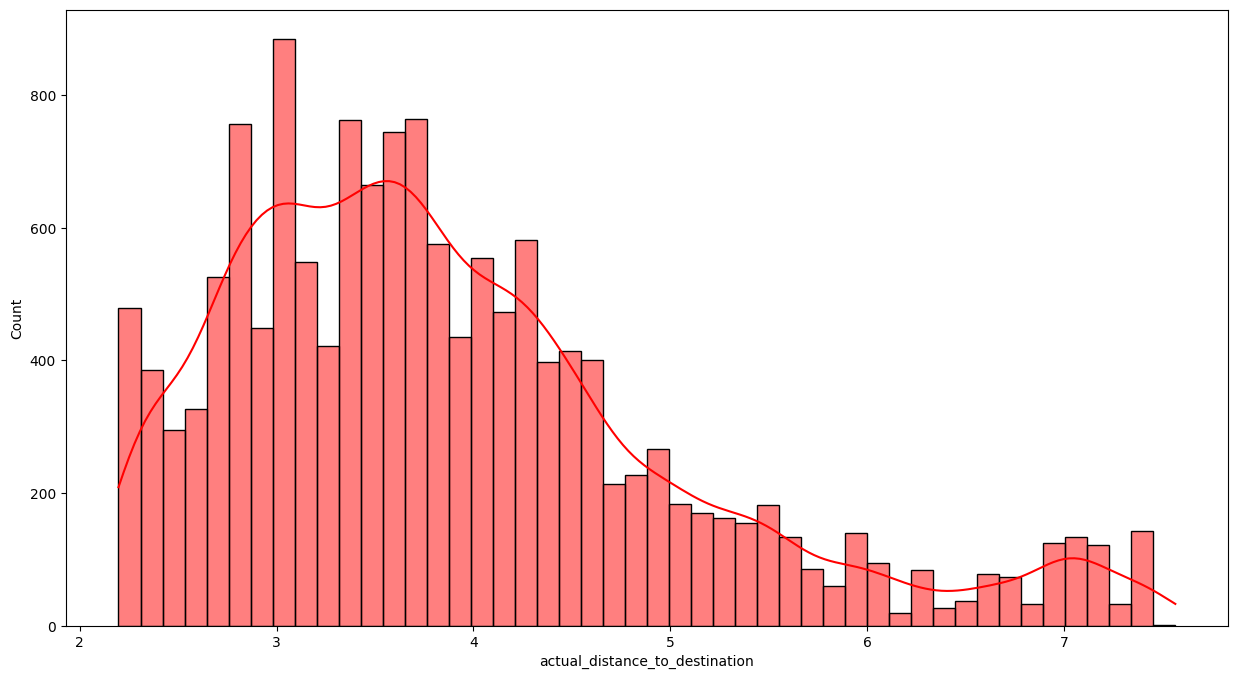

In [45]:
# Comparison of overall delivery distance distribution after log transformation
plt.figure(figsize=(15,8))
actual_distance_log =np.log(df_1['actual_distance_to_destination'])
sns.histplot(x=actual_distance_log, kde=True, color='red', alpha=0.5)
plt.show()

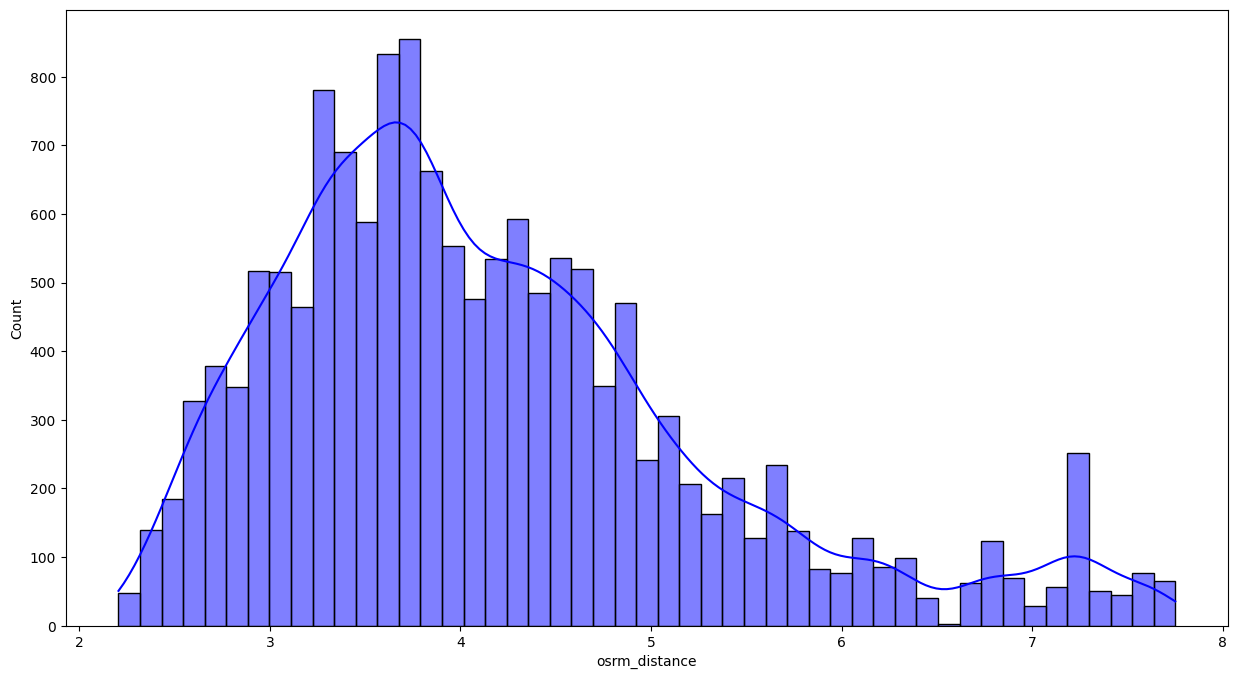

In [46]:
plt.figure(figsize=(15,8))
osrm_distance_log =np.log(df_1['osrm_distance'])
sns.histplot(x=osrm_distance_log, kde=True, color='blue', alpha=0.5)
plt.show()

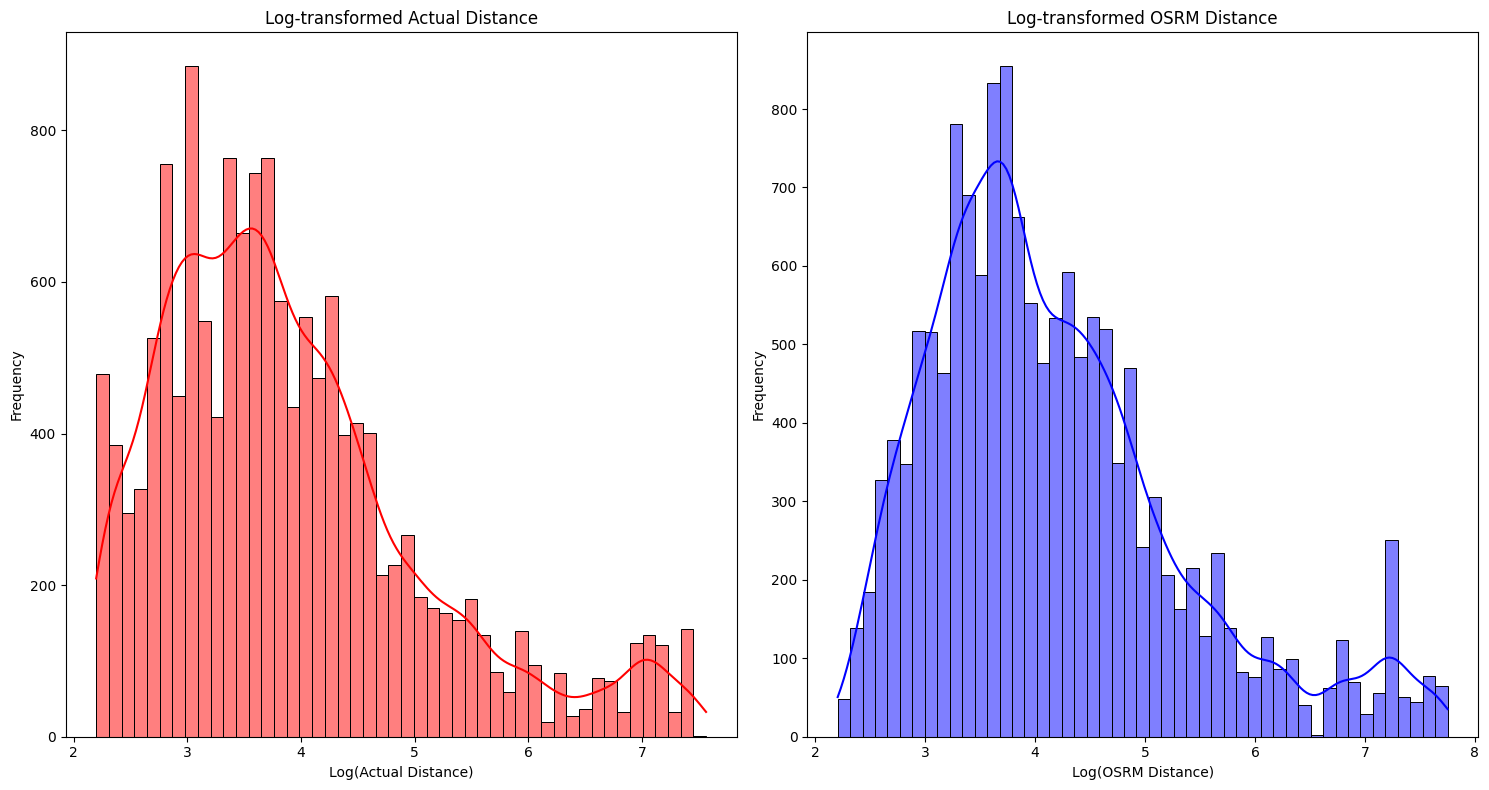

In [47]:
actual_distance_log = np.log(df_1['actual_distance_to_destination'])
osrm_time_log = np.log(df_1['osrm_distance'])

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.histplot(x=actual_distance_log, kde=True, color='red', alpha=0.5)
plt.title('Log-transformed Actual Distance')
plt.xlabel('Log(Actual Distance)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(x=osrm_distance_log, kde=True, color='blue', alpha=0.5)
plt.title('Log-transformed OSRM Distance')
plt.xlabel('Log(OSRM Distance)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Modelling Analysis**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("./filtered_delhivery_data.csv")
df.head()

,trip_creation_time,route_type,source_center,destination_center,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              144867 non-null  object 
 1   route_type                      144867 non-null  object 
 2   source_center                   144867 non-null  object 
 3   destination_center              144867 non-null  object 
 4   actual_distance_to_destination  144867 non-null  float64
 5   actual_time                     144867 non-null  float64
 6   osrm_time                       144867 non-null  float64
 7   osrm_distance                   144867 non-null  float64
 8   segment_actual_time             144867 non-null  float64
 9   segment_osrm_time               144867 non-null  float64
 10  segment_osrm_distance           144867 non-null  float64
dtypes: float64(7), object(4)
memory usage: 12.2+ MB


In [51]:
# convert to datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['route_type'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144867 non-null  datetime64[ns]
 1   route_type                      144867 non-null  object        
 2   source_center                   144867 non-null  object        
 3   destination_center              144867 non-null  object        
 4   actual_distance_to_destination  144867 non-null  float64       
 5   actual_time                     144867 non-null  float64       
 6   osrm_time                       144867 non-null  float64       
 7   osrm_distance                   144867 non-null  float64       
 8   segment_actual_time             144867 non-null  float64       
 9   segment_osrm_time               144867 non-null  float64       
 10  segment_osrm_distance           144867 non-null  float64

In [52]:
"""
• data - tells whether the data is testing or training data
• trip_creation_time – Timestamp of trip creation
• route_schedule_uuid – Unique Id for a particular route schedule
• route_type – Transportation type
• FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
• Carting: Handling system consisting of small vehicles (carts)
• trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
• source_center - Source ID of trip origin
• source_name - Source Name of trip origin
• destination_cente – Destination ID
• destination_name – Destination Name
• od_start_time – Trip start time
• od_end_time – Trip end time
• start_scan_to_end_scan – Time taken to deliver from source to destination
• is_cutoff – Unknown field
• cutoff_factor – Unknown field
• cutoff_timestamp – Unknown field
• actual_distance_to_destination – Distance in Kms between source and destination warehouse
• actual_time – Actual time taken to complete the delivery (Cumulative)
• osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
• osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
• factor – Unknown field
• segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
• segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
• segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
• segment_factor – Unknown field
"""
# the model construction is based on the dataset after cleaning
# As a result, it contias limited information
df.columns

Index(['trip_creation_time', 'route_type', 'source_center',
       'destination_center', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [53]:
# However, the diverge of data points among actual, osrm, and segment give the oppotuntity to decide the suitable pair

import itertools

actual_slice = df[['actual_distance_to_destination', 'actual_time']]
osrm_slice = df[['osrm_distance', 'osrm_time']]
segment_slice = df[['segment_osrm_distance', 'segment_osrm_time', 'segment_actual_time']]

print(f"The comparsion between orsm time and actual time within segment:\n{(segment_slice['segment_osrm_time'] == segment_slice['segment_actual_time']).value_counts()}\n")
print(f"The comparsion of distance between actual and osrm:\n{(actual_slice['actual_distance_to_destination'] == osrm_slice['osrm_distance']).value_counts()}\n")
print(f"The comparsion of time between actual and osrm:\n{(actual_slice['actual_time'] == osrm_slice['osrm_time']).value_counts()}\n")
# diverge can be observed from the value_counts
# therefore, the new columns present delta can be created

The comparsion between orsm time and actual time within segment:
False    140779
True       4088
Name: count, dtype: int64

The comparsion of distance between actual and osrm:
False    144867
Name: count, dtype: int64

The comparsion of time between actual and osrm:
False    144315
True        552
Name: count, dtype: int64



In [54]:
# using the loop of to create deltas within distance and time in different categories
distance_columns = ['actual_distance_to_destination', 'osrm_distance', 'segment_osrm_distance']
time_columns =['actual_time', 'osrm_time', 'segment_osrm_time', 'segment_actual_time']

# new dataframe being created to focus deviation
df_delta = df.copy()

# create columns record the delta within distance
for col1, col2 in itertools.combinations(distance_columns, 2):
    df_delta[f'{col1}_minus_{col2}'] = df_delta[col1] - df_delta[col2]

# create columns record the delta within time
for col1, col2 in itertools.combinations(time_columns, 2):
    df_delta[f'{col1}_minus_{col2}'] = df_delta[col1] - df_delta[col2]

df_delta.columns
df_delta.iloc[:, -9:].describe()
# as we can see the the deviaion is huge within these datapoints
# this phenomenon may result from the technical failures, and outliers should be removed

,actual_distance_to_destination_minus_osrm_distance,actual_distance_to_destination_minus_segment_osrm_distance,osrm_distance_minus_segment_osrm_distance,actual_time_minus_osrm_time,actual_time_minus_segment_osrm_time,actual_time_minus_segment_actual_time,osrm_time_minus_segment_osrm_time,osrm_time_minus_segment_actual_time,segment_osrm_time_minus_segment_actual_time
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,-50.697925,211.244352,261.942277,203.059254,398.419978,380.731416,195.360724,177.672161,-17.688563
std,81.388901,341.286673,417.199154,303.743664,595.747939,593.822579,305.740818,309.990667,49.010556
min,-469.458566,-469.358156,-136.985500,-110.000000,-107.000000,0.000000,-97.000000,-2418.000000,-2418.000000
25%,-54.992652,8.892952,13.789200,21.000000,38.000000,27.000000,14.000000,2.000000,-19.000000
50%,-14.802877,42.588930,55.768700,65.000000,114.000000,95.000000,47.000000,36.000000,-10.000000
75%,-4.790011,260.129576,314.624650,247.000000,491.000000,464.500000,236.000000,221.000000,-5.000000
max,0.230174,1920.757605,2319.509000,3137.000000,4532.000000,4532.000000,1682.000000,1658.000000,274.000000


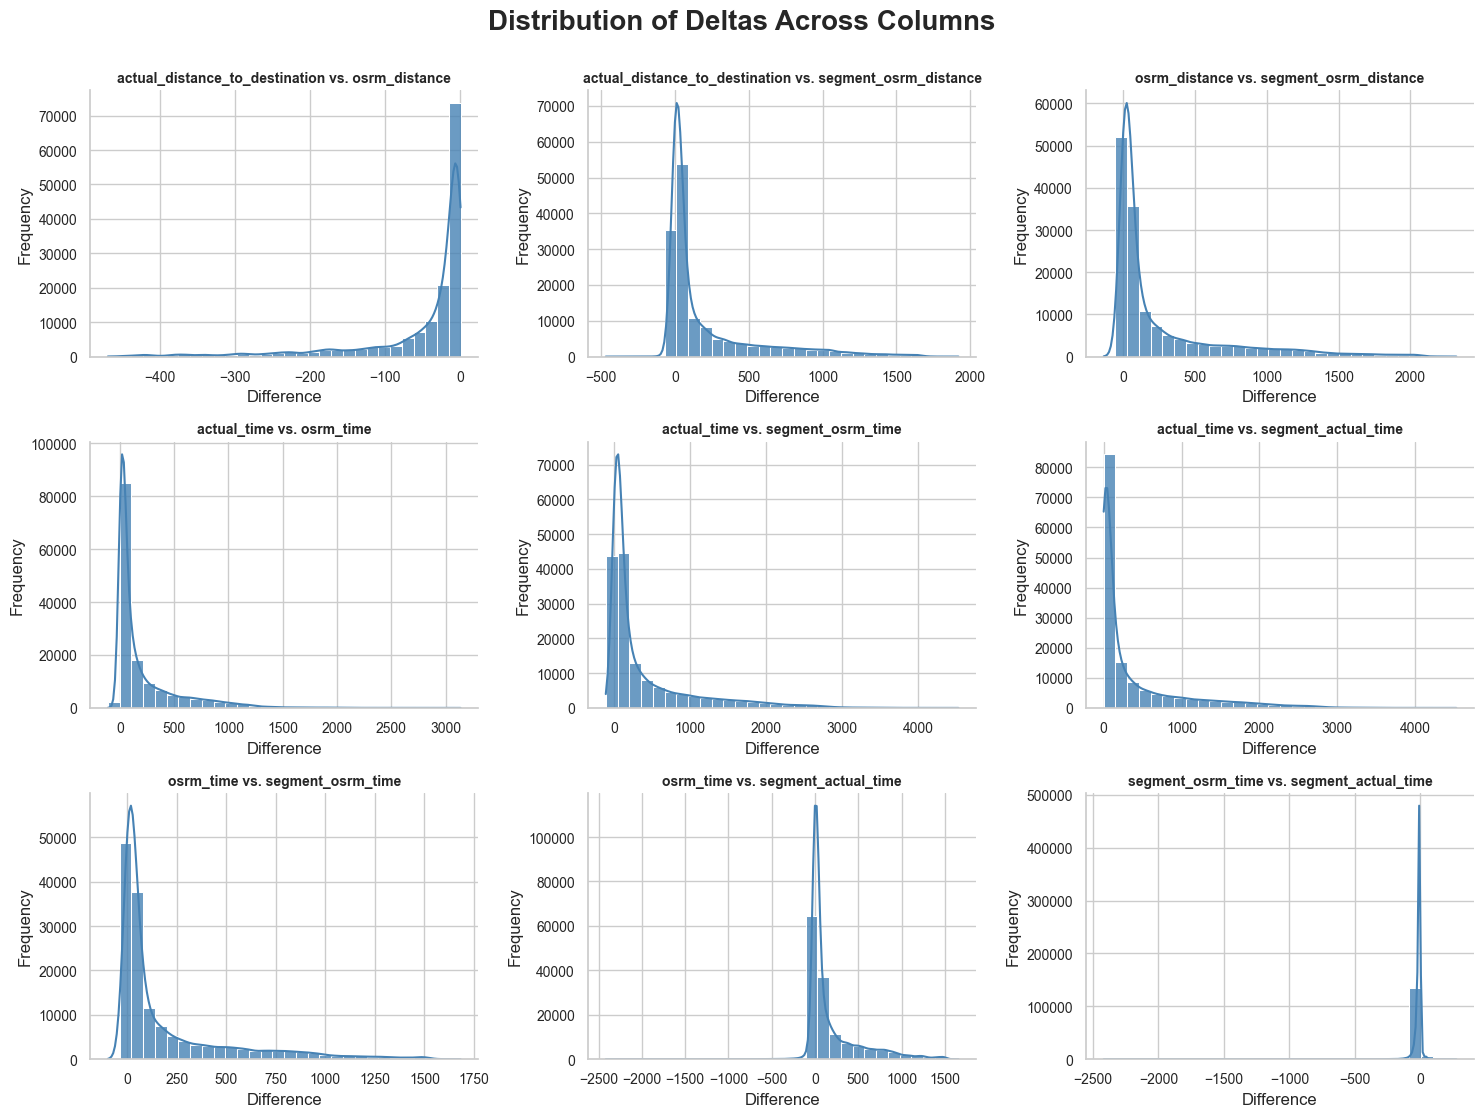

In [55]:
# these nine columns are the ones record deviations
delta_columns = df_delta.columns.tolist()[-9:]

# To plot the distribution of deviations, histplot is applied first

sns.set_theme(style="whitegrid", palette="muted")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# subplot introduced for better clarification
fig.suptitle('Distribution of Deltas Across Columns', fontsize=20, fontweight='bold', y=0.93)

for col, ax in zip(delta_columns, axes.flat):
    sns.histplot(
        df_delta[col],
        kde=True,
        bins=30,
        color='steelblue',
        edgecolor='white',
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f'{col.replace("_minus_", " vs. ")}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Difference', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    sns.despine(ax=ax, top=True, right=True)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

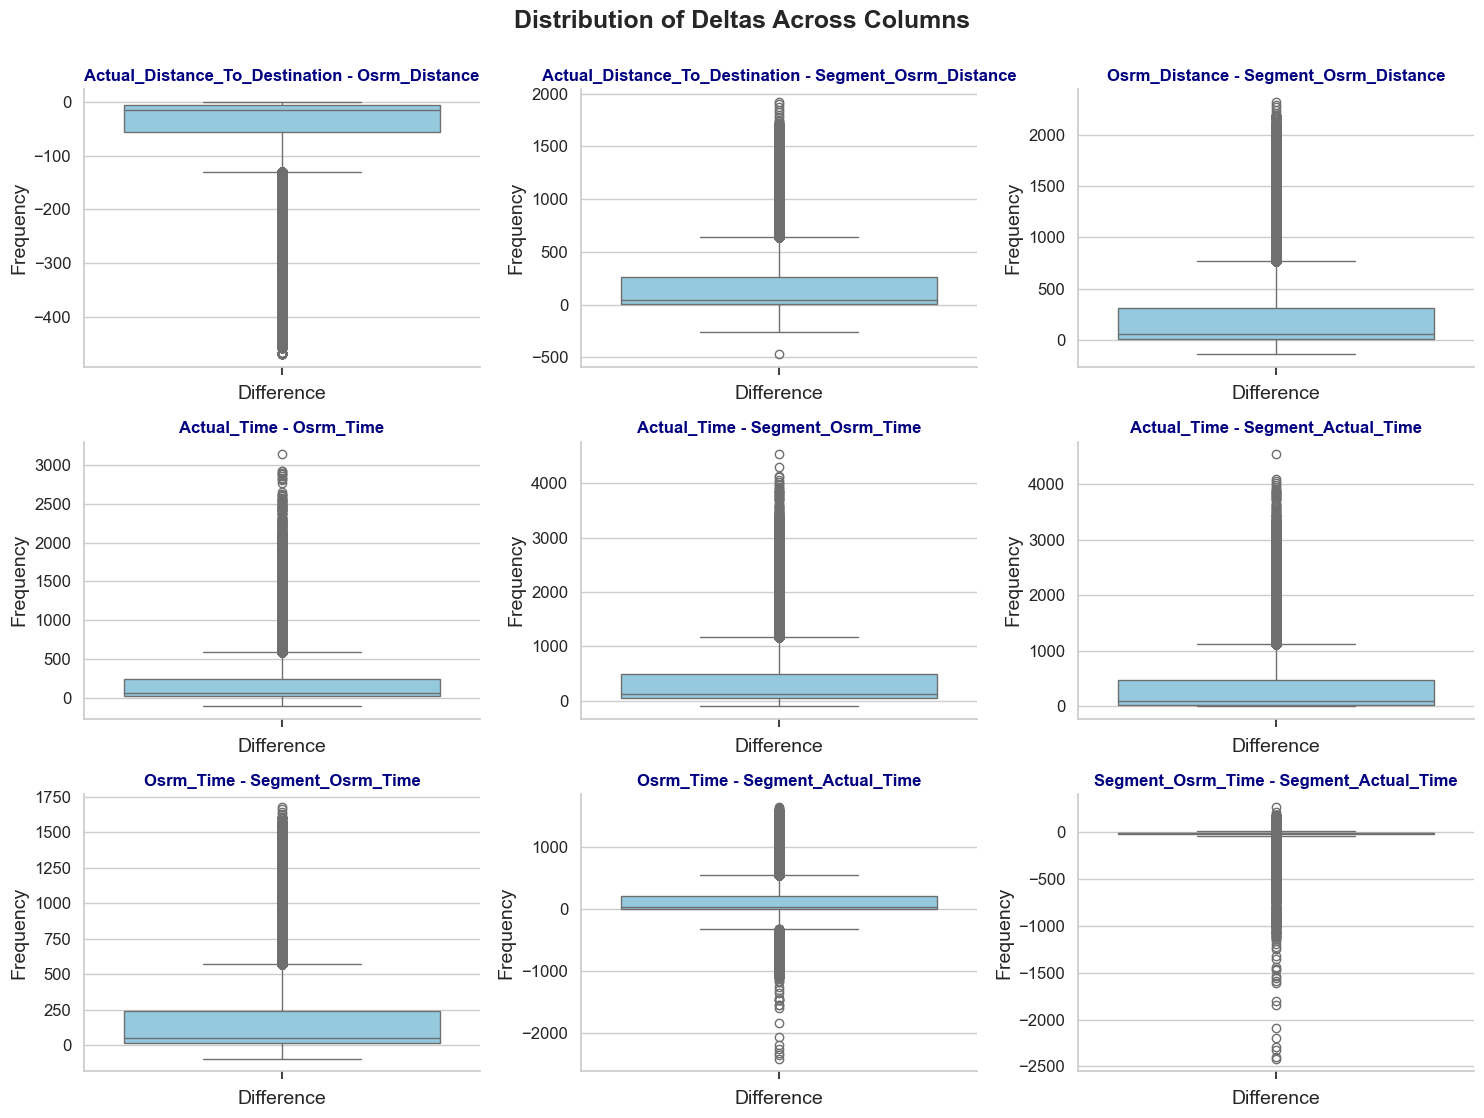

In [56]:

# the percentile is introduced, while the boxplots are created to visualize

df_percentile = df_delta[delta_columns]

# using the function to better reuse
def plot_nine_columns_boxplot(raw_data, delta_columns):
    sns.set_theme(style="whitegrid", palette="pastel")
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))

    fig.suptitle('Distribution of Deltas Across Columns', fontsize=18, fontweight='bold', y=0.93)

    for col, ax in zip(delta_columns, axes.flat):

        sns.boxplot(
            y=raw_data[col],
            color='skyblue',

            ax=ax,
            orient='y'
        )

        ax.set_title(f'{col.replace("_minus_", " - ").title()}', fontsize=12, fontweight='bold', color='navy')
        ax.set_xlabel('Difference', fontsize=14)
        ax.set_ylabel('Frequency', fontsize=14)
        ax.tick_params(axis='both', labelsize=12)

        ax.xaxis.set_ticks_position('bottom')
        sns.despine(ax=ax, top=True, right=True)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

plot_nine_columns_boxplot(df_percentile, delta_columns)

In [57]:
# Normally thinking the outlier can be removed through Quantile Method
#  the boxplot demonstrates better performance than normalization
for i in delta_columns:
    Q1 = df_delta[i].quantile(0.25)
    Q3 = df_delta[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_delta[i] < (Q1 - 1.5 * IQR)) | (df_delta[i] > (Q3 + 1.5 * IQR)))
    df_delta[f'{i}_outlier'] = outliers
df_delta.columns
df_delta['segment_osrm_time_minus_segment_actual_time_outlier'].value_counts()
last_9_columns = df_delta.iloc[:, -9:]
df_without_outliers = df_delta[~last_9_columns.all(axis=1)]

In [58]:
# It's abvious that some rows has been removed because of significant recording failure
df_without_outliers.shape[0] - df.shape[0]
df_without_outliers.shape[0] - df_delta.shape[0]


-1346

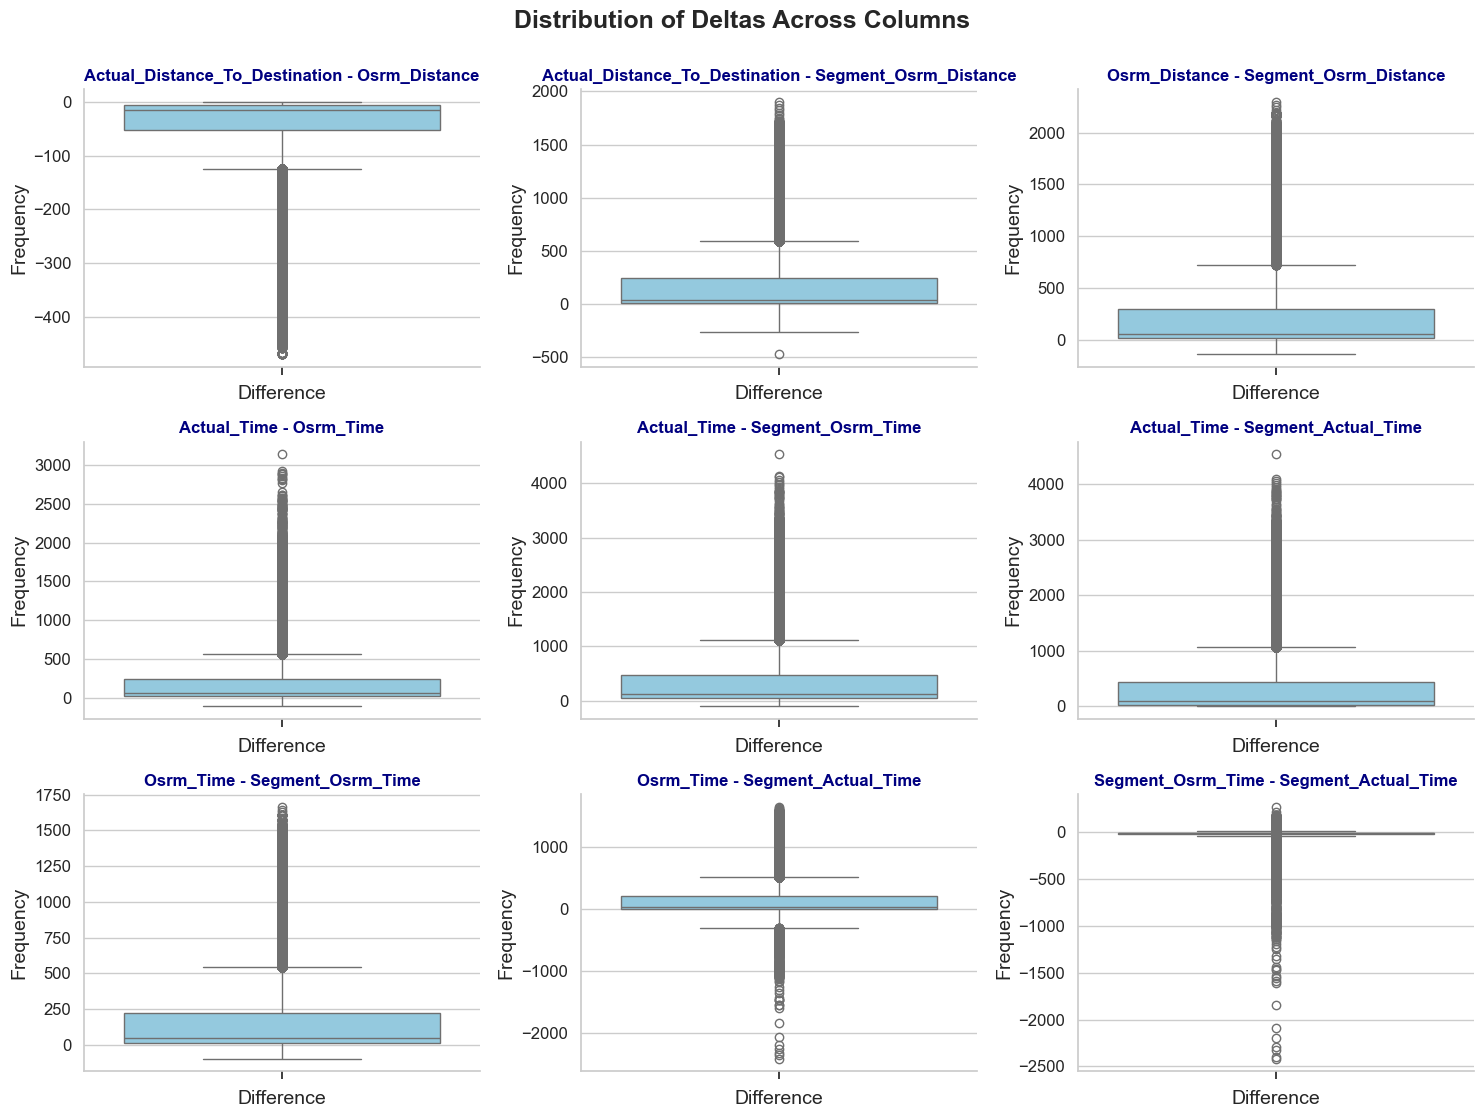

In [59]:
# reuse the boxplot to visualize the effects of outlier-removing method
plot_nine_columns_boxplot(df_without_outliers, delta_columns)

In [60]:
# To evulate the effect of outlier removing, the primary linear regression is ulilized
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

distance_time_pairs = list(itertools.product(distance_columns, time_columns))

class primary_linear_regression():
    def __init__(self, df_):
        self.df_ = df_

    def linear_regression_evaluation(self, X_raw, y_raw):
        X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # normal metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        mae = mean_absolute_error(y_test, y_pred)

        #R-Square calculation
        r2 = r2_score(y_test, y_pred)
        adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1)
        # take the number out of array
        coefficients = model.coef_[0]
        intercept = model.intercept_

        # SMAPE calculation
        smape = np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred) + 1e-10)) * 100

        results = {
            "coefficients": coefficients,
            "intercept": intercept,
            "mse": mse,
            "rmse": rmse,
            "mae": mae,
            "r2": r2,
            "adjusted_r2": adjusted_r2,
            "smape": smape
        }
        return results

    # The original data processing function without scaler
    """
    def get_dataset_from_pair(self, dis_time_index):
        # pair the distance and time
        X = df_without_outliers[distance_time_pairs[dis_time_index][0]].to_numpy().reshape(-1, 1)
        y = df_without_outliers[distance_time_pairs[dis_time_index][1]].to_numpy()
        #print(X, y)
        return X, y
    """

    def get_dataset_from_pair_and_standardize(self, dis_time_index):
        # pair the distance and time
        nummer_col = time_columns + distance_columns
        scaler_minmax = MinMaxScaler()
        df_scaled = self.df_[nummer_col]

        df_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_scaled), columns=nummer_col)
        #print(df_without_outliers)
        #df_scaled.head()
        X = df_scaled[distance_time_pairs[dis_time_index][0]].to_numpy().reshape(-1, 1)

        y = df_scaled[distance_time_pairs[dis_time_index][1]].to_numpy()
        #print(X, y)

        return X, y

    #get_dataset_from_pair(0)[0].shape

    def evaluate_linear_regressor(self):
        comparsion_dict = {}
        for pair_index in range(len(distance_time_pairs)):
            result_dict = {}
            X_raw, y_raw = self.get_dataset_from_pair_and_standardize(pair_index)
            #print(distance_time_pairs[pair_index])

            result_dict = self.linear_regression_evaluation(X_raw, y_raw)
            result_dict['Index'] = pair_index
            #print(result_dict)
            #break
            comparsion_dict[pair_index] = result_dict
        #print(comparsion_dict)
        comparsion_df = pd.DataFrame.from_dict(comparsion_dict, orient='index').set_index('Index')
        return comparsion_df

In [61]:
# to clearer visualization, the distance-time pair will only shown as the index in tables
# and the index meaning can be seen on the information below

Distance_time_pair_df= pd.DataFrame(distance_time_pairs, columns=['Distance', 'Time'])
Distance_time_pair_df.index.name = 'Index'

Distance_time_pair_df

,Distance,Time
Index,,
0,actual_distance_to_destination,actual_time
1,actual_distance_to_destination,osrm_time
2,actual_distance_to_destination,segment_osrm_time
3,actual_distance_to_destination,segment_actual_time
4,osrm_distance,actual_time
5,osrm_distance,osrm_time
6,osrm_distance,segment_osrm_time
7,osrm_distance,segment_actual_time
8,segment_osrm_distance,actual_time


In [62]:
Distance_time_pair_df.to_csv("Dis_time_pair.csv")

In [63]:
First_attempt = primary_linear_regression(df_without_outliers)
First_attempt.evaluate_linear_regressor()

,coefficients,intercept,mse,rmse,mae,r2,adjusted_r2,smape
Index,,,,,,,,
0,0.714910,0.005949,0.000747,0.027335,0.013411,0.954436,0.954434,33.740028
1,1.015008,0.004677,0.000282,0.016796,0.009898,0.991049,0.991049,21.217632
2,0.007499,0.010564,0.000076,0.008729,0.004857,0.022091,0.022056,44.391385
3,0.002015,0.084657,0.000260,0.016125,0.005760,0.000371,0.000336,6.132945
4,0.707784,0.005548,0.000716,0.026763,0.012830,0.956322,0.956321,32.965712
5,1.007526,0.003805,0.000059,0.007667,0.005194,0.998135,0.998135,16.390386
6,0.007970,0.010497,0.000076,0.008713,0.004851,0.025591,0.025558,44.335244
7,0.002288,0.084622,0.000260,0.016124,0.005759,0.000530,0.000496,6.131237
8,3.626116,0.049292,0.015466,0.124363,0.087258,0.056875,0.056842,110.644228


In [64]:
First_attempt_withoutExcludingOutliers = primary_linear_regression(df_delta)
First_attempt_withoutExcludingOutliers.evaluate_linear_regressor()

,coefficients,intercept,mse,rmse,mae,r2,adjusted_r2,smape
Index,,,,,,,,
0,0.718908,0.005780,0.000769,0.027726,0.013795,0.956072,0.956071,33.524041
1,1.015149,0.004610,0.000274,0.016566,0.009850,0.991770,0.991770,20.960563
2,0.008088,0.010550,0.000064,0.007991,0.004876,0.032223,0.032190,44.684773
3,0.003919,0.084567,0.000262,0.016199,0.005962,0.002685,0.002650,6.347660
4,0.711905,0.005418,0.000723,0.026887,0.013134,0.958689,0.958688,32.757801
5,1.007927,0.003780,0.000058,0.007614,0.005170,0.998261,0.998261,16.101583
6,0.008515,0.010486,0.000064,0.007972,0.004869,0.036885,0.036852,44.619910
7,0.004173,0.084530,0.000262,0.016196,0.005959,0.003126,0.003092,6.343607
8,3.687403,0.051728,0.016248,0.127467,0.090204,0.071540,0.071508,110.841167


In [65]:
# this analysis will focus on the metrics including R-Square and SMAPE based on the reference
# Obviously, this kind of outlier-removing methods can improve the performance according to metrics introduced
# But this kind of methods has fatal demerits, it removed the delta close to 0, which is totally unacceptable
# As a result, more refined processing methods shall be introduced

df_new_outlier_removing = df_delta.copy()
df_new_outlier_removing.shape

# due to the feature of deltas, the absoluate vaslue should be more convincing than nomaral percetile
# And the following comments are the one for contrast to new method
"""
for i in delta_columns:
    Q1 = df_delta[i].quantile(0.25)
    Q3 = df_delta[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_delta[i] < (Q1 - 1.5 * IQR)) | (df_delta[i] > (Q3 + 1.5 * IQR)))
    df_delta[f'{i}_outlier'] = outliers
df_delta.columns
df_delta['segment_osrm_time_minus_segment_actual_time_outlier'].value_counts()
last_9_columns = df_delta.iloc[:, -9:]
df_without_outliers = df_delta[~last_9_columns.all(axis=1)]
"""

abs(df_delta[delta_columns[0]]).quantile(0.25)

for i in delta_columns:
    Q1 = abs(df_delta[i]).quantile(0.25)
    Upbound = abs(df_delta[i]).quantile(0.75)
    IQR = Upbound - Q1
    outliers = (abs(df_delta[i]) > (Upbound + 1.5 * IQR))
    df_delta[f'{i}_upbounds'] = outliers

df_delta.columns


Index(['trip_creation_time', 'route_type', 'source_center',
       'destination_center', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance',
       'actual_distance_to_destination_minus_osrm_distance',
       'actual_distance_to_destination_minus_segment_osrm_distance',
       'osrm_distance_minus_segment_osrm_distance',
       'actual_time_minus_osrm_time', 'actual_time_minus_segment_osrm_time',
       'actual_time_minus_segment_actual_time',
       'osrm_time_minus_segment_osrm_time',
       'osrm_time_minus_segment_actual_time',
       'segment_osrm_time_minus_segment_actual_time',
       'actual_distance_to_destination_minus_osrm_distance_outlier',
       'actual_distance_to_destination_minus_segment_osrm_distance_outlier',
       'osrm_distance_minus_segment_osrm_distance_outlier',
       'actual_time_minus_osrm_time_outlier',
       'actual_time_minus_segment_osrm_time_ou

In [66]:
new_last_9_columns = df_delta.iloc[:, -9:]
new_last_9_columns.columns
new_last_9_columns['actual_distance_to_destination_minus_osrm_distance_upbounds'].value_counts()

actual_distance_to_destination_minus_osrm_distance_upbounds
False    126483
True      18384
Name: count, dtype: int64

In [67]:
new_df_exclue_outliers = df_delta[~new_last_9_columns.all(axis=1)]
new_df_exclue_outliers.shape

(143695, 38)

In [68]:
new_df_exclue_outliers.shape[0] - df_delta.shape[0]
# As we can see, 1172 rows has been removed from new methods

-1172

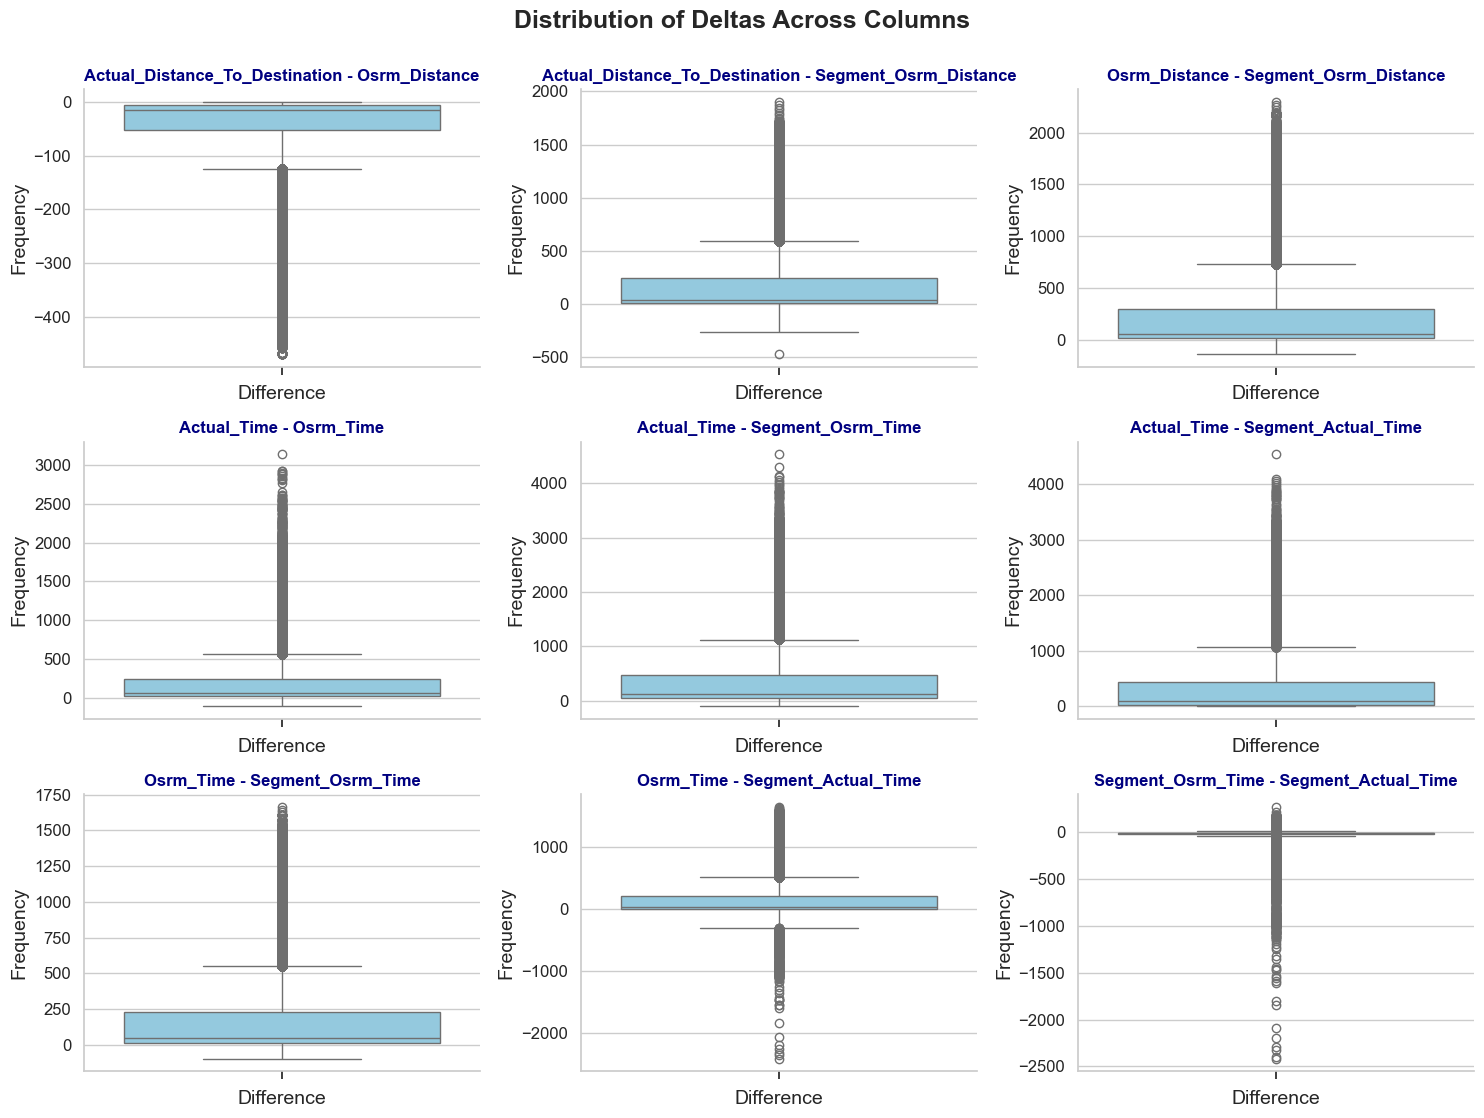

In [69]:
plot_nine_columns_boxplot(new_df_exclue_outliers, delta_columns)

In [70]:
# And it's time to retest the technique
New_attempt_after_removingOutliers = primary_linear_regression(new_df_exclue_outliers)
New_attempt_after_removingOutliers.evaluate_linear_regressor()

,coefficients,intercept,mse,rmse,mae,r2,adjusted_r2,smape
Index,,,,,,,,
0,0.715102,0.005957,0.000717,0.026785,0.013454,0.957233,0.957232,33.757646
1,1.014745,0.004707,0.000271,0.016452,0.009808,0.991674,0.991674,21.012766
2,0.007676,0.010582,0.000077,0.008799,0.004789,0.025079,0.025045,44.178299
3,0.001985,0.084700,0.000252,0.015888,0.005682,0.000550,0.000515,6.112636
4,0.708147,0.005530,0.000691,0.026294,0.012873,0.958786,0.958785,32.844172
5,1.007521,0.003796,0.000058,0.007626,0.005159,0.998211,0.998211,16.223571
6,0.008158,0.010514,0.000077,0.008783,0.004783,0.028577,0.028544,44.117316
7,0.002288,0.084662,0.000252,0.015887,0.005681,0.000695,0.000660,6.111290
8,3.712479,0.048565,0.015788,0.125649,0.088027,0.058852,0.058819,110.695293


In [71]:
New_attempt_after_removingOutliers.evaluate_linear_regressor().to_csv("linearregression.csv")

In [72]:
# the new method seems unideal, so the multiple regressor is introduced rather than linear regression
import numpy as np
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, HuberRegressor, BayesianRidge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from statistics import mean, stdev

def get_dataset_from_pair(dis_time_index):
	# pair the distance and time
	X, y = df_delta[distance_time_pairs[dis_time_index][0]].to_numpy().reshape(-1, 1), df_delta[distance_time_pairs[dis_time_index][1]].to_numpy()
	#print(X, y)
	return X, y

# list of models to evaluate
def get_models():
    models = dict()
    models['linear'] = LinearRegression()
    models['huber'] = HuberRegressor()
    models['bayesian'] = BayesianRidge()
    models['elasticnet'] = ElasticNet()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    return models

# cross-validation: k-fold
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

ModelComparsion = {}
for index_ in range(len(distance_time_pairs)):
	X, y = get_dataset_from_pair(index_)
	models = get_models()
	results, names = list(), list()
	for name, model in models.items():
		scores = evaluate_model(model, X, y)
		results.append(scores)
		names.append(name)
		#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	results_dict = dict(zip(names, results))
	print(results_dict)
	ModelComparsion[f'{distance_time_pairs[index_][0]}AND{distance_time_pairs[index_][1]}'] = results_dict

{'linear': array([0.9543424 , 0.9558759 , 0.9569332 , 0.95839976, 0.95746855,
       0.96121029, 0.95836232, 0.95800138, 0.95700931, 0.96002055,
       0.96190715, 0.95368223, 0.96026891, 0.95363494, 0.95888685,
       0.95708592, 0.9577    , 0.95797668, 0.95938862, 0.95679527,
       0.96100513, 0.95527947, 0.95611827, 0.95394205, 0.95748942,
       0.95868199, 0.96074539, 0.95809717, 0.9577778 , 0.95846439]), 'huber': array([0.95313426, 0.95478996, 0.95548755, 0.95706433, 0.95660833,
       0.9602738 , 0.95731595, 0.95694449, 0.95580555, 0.95893136,
       0.96110567, 0.95237817, 0.95914961, 0.95217352, 0.95781516,
       0.95569072, 0.9566344 , 0.95714282, 0.95801488, 0.95594696,
       0.95985664, 0.9540604 , 0.95486531, 0.95256168, 0.95661616,
       0.95735959, 0.95966467, 0.95712518, 0.9566601 , 0.95756765]), 'bayesian': array([0.9543424 , 0.9558759 , 0.95693319, 0.95839975, 0.95746856,
       0.96121029, 0.95836233, 0.95800139, 0.95700931, 0.96002055,
       0.96190715, 0.95368

In [73]:
data = []

for index, (key, value) in enumerate(ModelComparsion.items()):
    for model_name, scores in value.items():
        avg_score = np.mean(scores)
        data.append({
            "Index": index,
            "Category": key,
            "Model": model_name,
            "Average Score": avg_score
        })

# Create DataFrame from returned dictionaries
df = pd.DataFrame(data)

# Pivot the dataframe
pivoted_df = df.pivot(index='Index', columns='Model', values='Average Score')

print(pivoted_df)

Model  bayesian      cart  elasticnet     huber       knn    linear
Index                                                              
0      0.957752  0.920459    0.957752  0.956625  0.951946  0.957752
1      0.991759  0.985303    0.991759  0.991711  0.991057  0.991759
2      0.026078 -0.836694    0.026078  0.009557 -0.044619  0.026078
3      0.001972 -1.006959    0.001972 -0.016312 -0.154630  0.001972
4      0.959207  0.927146    0.959207  0.957915  0.955401  0.959207
5      0.998238  0.997126    0.998238  0.998202  0.998238  0.998238
6      0.029612 -0.723227    0.029612  0.013076 -0.040887  0.029612
7      0.002300 -0.902159    0.002300 -0.015875 -0.176694  0.002300
8      0.057075 -0.595033    0.057084 -0.048752 -0.019220  0.057074
9      0.057024 -0.583390    0.057034 -0.054784 -0.010734  0.057024
10     0.893111  0.806789    0.893076  0.878416  0.866393  0.893111
11     0.195861 -0.448225    0.195865  0.171237  0.063484  0.195861


In [74]:
# the new method seems unideal, so the multiple regressor is introduced rather than linear regression
import numpy as np
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, HuberRegressor, BayesianRidge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from statistics import mean, stdev

def get_dataset_from_pair(dis_time_index):
	# pair the distance and time
	X, y = new_df_exclue_outliers[distance_time_pairs[dis_time_index][0]].to_numpy().reshape(-1, 1), new_df_exclue_outliers[distance_time_pairs[dis_time_index][1]].to_numpy()
	#print(X, y)
	return X, y

# list of models to evaluate
def get_models():
    models = dict()
    models['linear'] = LinearRegression()
    models['huber'] = HuberRegressor()
    models['bayesian'] = BayesianRidge()
    models['elasticnet'] = ElasticNet()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    return models

# cross-validation: k-fold
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

ModelComparsion = {}
for index_ in range(len(distance_time_pairs)):
	X, y = get_dataset_from_pair(index_)
	models = get_models()
	results, names = list(), list()
	for name, model in models.items():
		scores = evaluate_model(model, X, y)
		results.append(scores)
		names.append(name)
		#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	results_dict = dict(zip(names, results))
	print(results_dict)
	ModelComparsion[f'{distance_time_pairs[index_][0]}AND{distance_time_pairs[index_][1]}'] = results_dict

{'linear': array([0.95270777, 0.96029726, 0.95486913, 0.95505683, 0.95681335,
       0.95715955, 0.96010976, 0.95677998, 0.95593298, 0.95832913,
       0.95635992, 0.9573924 , 0.95587063, 0.9591383 , 0.95399025,
       0.95797655, 0.96097911, 0.95279974, 0.95622487, 0.95727136,
       0.9551724 , 0.95896381, 0.95532634, 0.95984979, 0.96017631,
       0.95481652, 0.95559956, 0.95551869, 0.95779753, 0.95467307]), 'huber': array([0.95119979, 0.95938515, 0.9534044 , 0.95372844, 0.95602322,
       0.95632297, 0.95883121, 0.95590347, 0.95487674, 0.95739518,
       0.95521292, 0.95613276, 0.95468666, 0.95808406, 0.9526717 ,
       0.9570782 , 0.95989391, 0.9517337 , 0.95534034, 0.95615179,
       0.95383559, 0.95777737, 0.95430026, 0.9591833 , 0.95906163,
       0.95327079, 0.95454189, 0.95432684, 0.95699854, 0.95360724]), 'bayesian': array([0.95270776, 0.96029726, 0.95486913, 0.95505682, 0.95681335,
       0.95715955, 0.96010976, 0.95677998, 0.95593298, 0.95832913,
       0.95635992, 0.95739

In [75]:
data = []

for index, (key, value) in enumerate(ModelComparsion.items()):
    for model_name, scores in value.items():
        avg_score = np.mean(scores)
        data.append({
            "Index": index,
            "Category": key,
            "Model": model_name,
            "Average Score": avg_score
        })

# Create DataFrame from returned dictionaries
df = pd.DataFrame(data)

# Pivot the dataframe
pivoted_df = df.pivot(index='Index', columns='Model', values='Average Score')

print(pivoted_df)

Model  bayesian      cart  elasticnet     huber       knn    linear
Index                                                              
0      0.956798  0.918648    0.956798  0.955699  0.950741  0.956798
1      0.991385  0.984656    0.991385  0.991338  0.990706  0.991385
2      0.022942 -0.725991    0.022942  0.006754 -0.045484  0.022942
3      0.000410 -0.946245    0.000410 -0.017298 -0.158246  0.000410
4      0.958343  0.924042    0.958343  0.957077  0.954118  0.958343
5      0.998158  0.996969    0.998158  0.998120  0.998155  0.998158
6      0.026473 -0.774712    0.026474  0.010344 -0.054799  0.026473
7      0.000570 -0.943727    0.000570 -0.016968 -0.184639  0.000570
8      0.054056 -0.595282    0.054064 -0.051817 -0.020655  0.054056
9      0.054005 -0.583189    0.054014 -0.057856 -0.011749  0.054005
10     0.890855  0.802963    0.890816  0.875849  0.863060  0.890855
11     0.192024 -0.454544    0.192030  0.167673  0.060960  0.192024


In [76]:
pivoted_df.to_csv("multiple_regressors.csv")